In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import os
import matplotlib.style
from pandas.core.common import flatten
from functools import partial, reduce
import sys
sys.path.append('../../')
from config.constants import *

In [146]:
import mplfinance as mpf
import plotly.graph_objects as go

In [147]:
plt.style.use('ggplot')

In [148]:
PATH_DATA

'../../data/'

In [149]:
CURRENCY_PAIRS

['EURUSD/EURUSD_H4 - EURUSD_H4',
 'AUDUSD/AUDUSD_H4 - AUDUSD_H4',
 'GBPUSD/GBPUSD_H4 - GBPUSD_H4',
 'NZDUSD/NZDUSD_H4 - NZDUSD_H4',
 'USDCAD/USDCAD_H4 - USDCAD_H4',
 'USDCHF/USDCHF_H4 - USDCHF_H4',
 'USDJPY/USDJPY_H4 - USDJPY_H4',
 'XAUUSD/XAUUSD_H4 - XAUUSD_H4']

In [150]:
pairs_list = [
    'EURUSD/EURUSD_H4 - EURUSD_H4',
    'AUDUSD/AUDUSD_H4 - AUDUSD_H4',
    'GBPUSD/GBPUSD_H4 - GBPUSD_H4',
    'NZDUSD/NZDUSD_H4 - NZDUSD_H4',
    'USDCAD/USDCAD_H4 - USDCAD_H4',
    'USDCHF/USDCHF_H4 - USDCHF_H4',
    'USDJPY/USDJPY_H4 - USDJPY_H4',
    'XAUUSD/XAUUSD_H4 - XAUUSD_H4',
]

In [151]:
start_date = '2007-01-01'
end_date = '2008-03-10'

In [152]:
df ={}
for pair in range(len(CURRENCY_PAIRS)) :
    df[pair] = pd.read_csv(PATH_DATA +CURRENCY_PAIRS[pair]+'.csv',index_col=0,parse_dates=True)
    df[pair] = df[pair].loc[start_date:end_date]
    df[pair]['Day'] = df[pair].index.dayofweek
    dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    df[pair]['Day'] = df[pair]['Day'].map(dmap)

In [153]:
df

{0:                         Open     High      Low    Close   Volume  Day
 Time                                                                 
 2007-03-05 12:00:00  1.30956  1.31145  1.30723  1.30979   185987  Mon
 2007-03-05 16:00:00  1.30960  1.31112  1.30833  1.30981  1025327  Mon
 2007-03-05 20:00:00  1.30979  1.30986  1.30782  1.30840   235967  Mon
 2007-03-06 00:00:00  1.30813  1.31113  1.30798  1.31071   191415  Tue
 2007-03-06 04:00:00  1.31078  1.31262  1.30923  1.31211   187099  Tue
 ...                      ...      ...      ...      ...      ...  ...
 2008-03-10 04:00:00  1.53827  1.54003  1.53567  1.53825   151332  Mon
 2008-03-10 08:00:00  1.53815  1.53893  1.53361  1.53522   240519  Mon
 2008-03-10 12:00:00  1.53570  1.53765  1.53116  1.53665   173207  Mon
 2008-03-10 16:00:00  1.53663  1.53764  1.53284  1.53487   153785  Mon
 2008-03-10 20:00:00  1.53495  1.53678  1.53330  1.53352    94059  Mon
 
 [1646 rows x 6 columns],
 1:                         Open     High     

In [154]:
mask = df[0]['Day'] == 'Sun'

# Use the mask to filter the DataFrame and get only the rows where 'Day' is 'Sun'
sundays_df = df[0][mask]
sundays_df

,Open,High,Low,Close,Volume,Day
Time,,,,,,
2007-03-11 20:00:00,1.31236,1.31415,1.31068,1.31242,144952,Sun
2007-03-18 20:00:00,1.33064,1.33196,1.33064,1.33161,140627,Sun
2007-03-25 20:00:00,1.32801,1.32933,1.32571,1.32708,191699,Sun
2007-04-01 20:00:00,1.33710,1.33770,1.33520,1.33540,60580,Sun
2007-04-08 20:00:00,1.33740,1.33798,1.33635,1.33680,30738,Sun
2007-04-15 20:00:00,1.35540,1.35770,1.35221,1.35680,39318,Sun
2007-04-22 20:00:00,1.35975,1.36070,1.35929,1.35990,24120,Sun
2007-04-29 20:00:00,1.36305,1.36480,1.36150,1.36235,41222,Sun
2007-05-06 20:00:00,1.36015,1.36023,1.35883,1.35917,56966,Sun


In [155]:
df[0]

,Open,High,Low,Close,Volume,Day
Time,,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987,Mon
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327,Mon
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967,Mon
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415,Tue
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099,Tue
...,...,...,...,...,...,...
2008-03-10 04:00:00,1.53827,1.54003,1.53567,1.53825,151332,Mon
2008-03-10 08:00:00,1.53815,1.53893,1.53361,1.53522,240519,Mon
2008-03-10 12:00:00,1.53570,1.53765,1.53116,1.53665,173207,Mon


In [156]:
# pairs_list = []
# for filename in os.listdir(path):
#     if filename.endswith('.csv'):
#         pairs_list.append(filename.split('.')[0])
# print(pairs_list)

# df = {}
# for pair in range(len(pairs_list)):
#     df[pair] = pd.read_csv(pairs_list[pair]+'.csv', header = 0)
#     df[pair].columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
#     df[pair]['Date'] = df[pair]['Date'].str.split(' ').str[0:2]
#     df[pair]['Date'] = df[pair]['Date'].str.join(' ')
#     df[pair].set_index('Date', inplace = True)
#     df[pair].index = pd.to_datetime(df[pair].index, format = '%d.%m.%Y %H:%M:%S.%f')
#     df[pair]['Day'] = df[pair].index.dayofweek
#     dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
#     df[pair]['Day'] = df[pair]['Day'].map(dmap)

In [157]:
def ATR(df, n):
    df = df.copy()
    df['High-Low'] = abs(df['High'] - df['Low'])
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis = 1, skipna = False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df = df.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis = 1)
    return df

def CAGR(df, source_df,account_size):
    df = df.copy()
    n = len(source_df) / (252*24)
    return round((((df['cum_res'][-1] / account_size)**(1/n)) - 1) * 100, 1)

def sharpe_ratio(df):
    df = df.copy()
    returns = df['cum_res'].pct_change()
    volatility = returns.std() * np.sqrt(252)
    return round((returns.mean() - 0.02) / volatility, 2)

def max_drawdown(df):
    df = df.copy()
    cum_returns = (1 + df['cum_res']).cumprod()
    drawdown = 1 - df['cum_res'].div(df['cum_res'].cummax())
    return round(max(drawdown.expanding().max() * 100), 2)

In [158]:
#Strategy parameters
account_size = 1000
slippage = 2
size = 1
ATR_SL = 0.5

for pair in range(len(pairs_list)):
    df[pair]['ATR'] = ATR(df[pair], 20)['ATR']
    df[pair]['direction'] = np.where(df[pair]['Close'] > df[pair]['Open'], 'bull', 'bear')
    df[pair]['dir_count'] = df[pair].groupby((df[pair]['direction'] != df[pair]['direction'].shift(1)).cumsum()).cumcount()+1
    if 'USDJPY/USDJPY_H4 - USDJPY_H4'  not in pairs_list[pair] and 'XAUUSD/XAUUSD_H4 - XAUUSD_H4'  not in pairs_list[pair] :
        df[pair]['spread'] = float(slippage) / float(10000)
        df[pair]['size'] = float(size) * float(10000)
        print('Pair: ', pairs_list[pair], 'a')

    
    else:
        df[pair]['spread'] = float(slippage) / float(100)
        df[pair]['size'] = float(size) * float(100)
        print('Pair: ', pairs_list[pair], 'b')

Pair:  EURUSD/EURUSD_H4 - EURUSD_H4 a
Pair:  AUDUSD/AUDUSD_H4 - AUDUSD_H4 a
Pair:  GBPUSD/GBPUSD_H4 - GBPUSD_H4 a
Pair:  NZDUSD/NZDUSD_H4 - NZDUSD_H4 a
Pair:  USDCAD/USDCAD_H4 - USDCAD_H4 a
Pair:  USDCHF/USDCHF_H4 - USDCHF_H4 a
Pair:  USDJPY/USDJPY_H4 - USDJPY_H4 b
Pair:  XAUUSD/XAUUSD_H4 - XAUUSD_H4 b


In [159]:
open_trade = {}
trade = {}
long_take_profit = {}
short_take_profit = {}
long_stop_loss = {}
short_stop_loss = {}
long_entry_price = {}
short_entry_price = {}

for pair in range(len(pairs_list)):
    open_trade[pair] = []
    trade[pair] = {}
    long_take_profit[pair] = []
    short_take_profit[pair] = []
    long_stop_loss[pair] = []
    short_stop_loss[pair] = []
    long_entry_price[pair] = []
    short_entry_price[pair] = []

    # -----------
    df[pair]['entry_price'] = np.nan
    df[pair]['TP'] = np.nan
    df[pair]['SL'] = np.nan
    df[pair]['profit/loss'] = np.nan
    
    for i in range(20, len(df[pair])):
        #Buy
        if df[pair]['dir_count'][i - 1] >= 5 and df[pair]['direction'][i - 1] == 'bull' and len(open_trade[pair]) == 0:
            # print(i, 'New Long trade at price:', round(df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                              'date_of_trade': df[pair].index[i],
                              'day_of_trade': df[pair]['Day'][i],
                              'entry_price': df[pair]['Close'][i],
                              'signal': 'Buy',
                              'result': 0,
                              'TP': df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL,
                              'SL': df[pair]['Open'][i]}
            open_trade[pair].append(i)
            long_take_profit[pair].append(trade[pair][i]['TP'])
            long_stop_loss[pair].append(trade[pair][i]['SL'])
            long_entry_price[pair].append(trade[pair][i]['entry_price'])
            # --------------------
            df[pair]['entry_price'][i] = df[pair]['Close'][i]
            df[pair]['TP'][i] = df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL
            df[pair]['SL'][i] = df[pair]['Open'][i]
        
        #Sell
        if df[pair]['dir_count'][i - 1] >= 5 and df[pair]['direction'][i - 1] == 'bear' and len(open_trade[pair]) == 0:
            # print(i, 'New Short trade at price:', round(df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                              'date_of_trade': df[pair].index[i],
                              'day_of_trade': df[pair]['Day'][i],
                              'entry_price': df[pair]['Close'][i],
                              'signal': 'Sell',
                              'result': 0,
                              'TP': df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL,
                              'SL': df[pair]['Open'][i]}
            open_trade[pair].append(i)
            short_take_profit[pair].append(trade[pair][i]['TP'])
            short_stop_loss[pair].append(trade[pair][i]['SL'])
            short_entry_price[pair].append(trade[pair][i]['entry_price'])
            # -----------------------
            df[pair]['entry_price'][i] = df[pair]['Close'][i]
            df[pair]['TP'][i] = df[pair]['Close'][i] - \
                df[pair]['ATR'][i] * ATR_SL
            df[pair]['SL'][i] = df[pair]['Open'][i]
            
        #Exit trades---------------------------------------------------------------------------
        #Buy profit
        if any(y <= df[pair]['Close'][i] for y in long_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] >= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (
                            df[pair]['Close'][i] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        # print(j, 
                        #      'Long profit at price:', round(df[pair]['Close'][i], 4),
                        #      'On day:', df[pair].index[i],
                        #      'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])

                        # ------------------
                        df[pair]['profit/loss'][i] = 'Buy profit'
        #Buy loss
        if any(y >= df[pair]['Close'][i] for y in long_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] <= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (
                            df[pair]['Close'][i] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        # print(j, 
                        #      'Long loss at price:', round(df[pair]['Close'][i], 4),
                        #      'On day:', df[pair].index[i],
                        #      'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])
                        # ------------------
                        df[pair]['profit/loss'][i] = 'Buy loss'
                        
        #Sell profit
        if any(y >= df[pair]['Close'][i] for y in short_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] <= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['entry_price'] - df[pair]['Close'][i] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        # print(j, 
                        #      'Short profit at price:', round(df[pair]['Close'][i], 4),
                        #      'On day:', df[pair].index[i],
                        #      'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
                        # ------------------
                        df[pair]['profit/loss'][i] = 'Sell profit'
                        
        #Sell loss
        if any(y <= df[pair]['Close'][i] for y in short_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] >= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['entry_price'] - df[pair]['Close'][i] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        # print(j, 
                        #      'Short loss at price:', round(df[pair]['Close'][i], 4),
                        #      'On day:', df[pair].index[i],
                        #      'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
                        # ------------------
                        df[pair]['profit/loss'][i] = 'Sell loss'
        #Exit after time
        # if len(open_trade[pair]) != 0:
        #     for j in open_trade[pair]:
        #         if (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
        #             trade[pair][j].update({'result' : (df[pair]['Close'][i] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
        #             print(j, 
        #                  'Long exited after 12 hours:', round(df[pair]['Close'][i], 4),
        #                  'On day:', df[pair].index[i],
        #                  'With profit:', round(trade[pair][j]['result'], 4), '\n')
        #             open_trade[pair].remove(j)
        #             long_take_profit[pair].remove(trade[pair][j]['TP'])
        #             long_stop_loss[pair].remove(trade[pair][j]['SL'])
        #         elif (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
        #             trade[pair][j].update({'result' : (trade[pair][j]['entry_price'] - df[pair]['Close'][i] - df[pair]['spread'][i]) * df[pair]['size'][i]})
        #             print(j, 
        #                  'Short exited after 12 hours:', round(df[pair]['Close'][i], 4),
        #                  'On day:', df[pair].index[i],
        #                  'With profit:', round(trade[pair][j]['result'], 4), '\n')
        #             open_trade[pair].remove(j)
        #             short_take_profit[pair].remove(trade[pair][j]['TP'])
        #             short_stop_loss[pair].remove(trade[pair][j]['SL'])

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\907208912.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\907208912.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\907208912.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\907208912.py:118: SettingWithCopyWarning:


A value is

In [160]:
pairs_results = {}
profits = {}
losses = {}
be = {}

for pair in range(len(pairs_list)):
    profits[pair] = []
    losses[pair] = []
    be[pair] = []
    
    pairs_results[pair] = pd.DataFrame.from_dict({(i, j): trade[pair][j] for j in trade[pair].keys()}, orient = 'index')
    pairs_results[pair] = pairs_results[pair].drop(['signal', 'ID', 'TP', 'SL'], axis = 1)
    pairs_results[pair].set_index('date_of_trade', inplace = True)
    pairs_results[pair]['cum_res'] = pairs_results[pair]['result'].cumsum() + account_size
    
    for t in trade[pair]:
        profits[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] > 0.1 else ''
        losses[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] < -0.1 else ''
        be[pair].append(trade[pair][t]['result']) if -0.1 <= trade[pair][t]['result'] <= 0.1 else ''
        
my_reduce = partial(pd.merge, on = 'date_of_trade', how = 'outer')
strategy_results = reduce(my_reduce, pairs_results.values())
strategy_results = strategy_results.sort_index()
strategy_results['final_res'] = strategy_results.filter(like = 'result', axis = 1).sum(axis = 1)
strategy_results['cum_res'] = strategy_results['final_res'].cumsum() + account_size

profits_keys = list(profits.keys())
profits_values = [profits[x] for x in profits_keys]
str_profits = list(flatten(profits_values))

losses_keys = list(losses.keys())
losses_values = [losses[x] for x in losses_keys]
str_losses = list(flatten(losses_values))

be_keys = list(be.keys())
be_values = [be[x] for x in be_keys]
str_be = list(flatten(be_values))

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\518135374.py:22: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'result_x', 'day_of_trade_x', 'cum_res_x', 'entry_price_x'} in the result is deprecated and will raise a MergeError in a future version.

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\518135374.py:22: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'result_x', 'day_of_trade_x', 'cum_res_x', 'entry_price_x'} in the result is deprecated and will raise a MergeError in a future version.

C:\Users\Win10\AppData\Local\Temp\ipykernel_2744\518135374.py:22: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'result_x', 'day_of_trade_x', 'cum_res_x', 'entry_price_x'} in the result is deprecated and will raise a MergeError in a future version.



In [161]:
data = df[7]
data

,Open,High,Low,Close,Volume,Day,ATR,direction,dir_count,spread,size,entry_price,TP,SL,profit/loss
Time,,,,,,,,,,,,,,,
2007-01-01 00:00:00,635.679,636.194,635.009,635.497,95,Mon,NaN,bear,1,0.02,100.0,NaN,NaN,NaN,NaN
2007-01-01 04:00:00,635.336,636.220,635.254,635.699,97,Mon,NaN,bull,1,0.02,100.0,NaN,NaN,NaN,NaN
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,Mon,NaN,bull,2,0.02,100.0,NaN,NaN,NaN,NaN
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,Mon,NaN,bear,1,0.02,100.0,NaN,NaN,NaN,NaN
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,Mon,NaN,bull,1,0.02,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-10 04:00:00,975.066,976.794,974.364,975.817,236,Mon,7.78280,bull,1,0.02,100.0,NaN,NaN,NaN,NaN
2008-03-10 08:00:00,975.850,980.428,965.608,967.910,240,Mon,8.36400,bear,1,0.02,100.0,NaN,NaN,NaN,NaN
2008-03-10 12:00:00,967.982,971.957,961.151,965.800,240,Mon,8.54645,bear,2,0.02,100.0,NaN,NaN,NaN,NaN


In [162]:
data.to_csv('C:\\Users\\Win10\Desktop\\Forex_algorithm_trading\\backtest\\Strategy+8+-+Momentum.ipynb\\data.csv', index=True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1928 entries, 2007-01-01 00:00:00 to 2008-03-10 20:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1928 non-null   float64
 1   High         1928 non-null   float64
 2   Low          1928 non-null   float64
 3   Close        1928 non-null   float64
 4   Volume       1928 non-null   int64  
 5   Day          1928 non-null   object 
 6   ATR          1908 non-null   float64
 7   direction    1928 non-null   object 
 8   dir_count    1928 non-null   int64  
 9   spread       1928 non-null   float64
 10  size         1928 non-null   float64
 11  entry_price  56 non-null     float64
 12  TP           56 non-null     float64
 13  SL           56 non-null     float64
 14  profit/loss  56 non-null     object 
dtypes: float64(10), int64(2), object(3)
memory usage: 241.0+ KB


In [164]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'],
                                     name='Candlestick'),
                      go.Scatter(x=data.index, y=data['SL'],
                                 mode='lines',
                                 line=dict(color='black'),
                                 name='Stop Loss'),
                      go.Scatter(x=data.index, y=data['TP'],
                                 mode='lines',
                                 line=dict(color='green'),
                                 name='Take Profit')
                      ])

# Customize the layout of the plot
fig.update_layout(title='Stock Chart with SL and TP',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  yaxis2=dict(anchor='x', overlaying='y', side='right'),
                  yaxis2_title='SL/TP Levels',
                  width = 1000,
                  height = 800,

                  )

# Display the plot
fig.show()

In [165]:
pairs_results[7]

,day_of_trade,entry_price,result,cum_res
date_of_trade,,,,
2007-01-22 00:00:00,Mon,635.765,-162.7,837.3
2007-01-23 16:00:00,Tue,647.117,-263.9,573.4
2007-01-26 12:00:00,Fri,644.823,-2.0,571.4
2007-02-27 20:00:00,Tue,664.678,-481.5,89.9
2007-03-15 08:00:00,Thu,644.737,292.3,382.2
2007-03-15 16:00:00,Thu,645.132,-2.0,380.2
2007-03-19 08:00:00,Mon,654.474,-2.0,378.2
2007-04-04 20:00:00,Wed,673.597,-174.4,203.8
2007-04-06 00:00:00,Fri,673.432,-2.0,201.8


Text(0.5, 1.0, 'Returns of each pair')

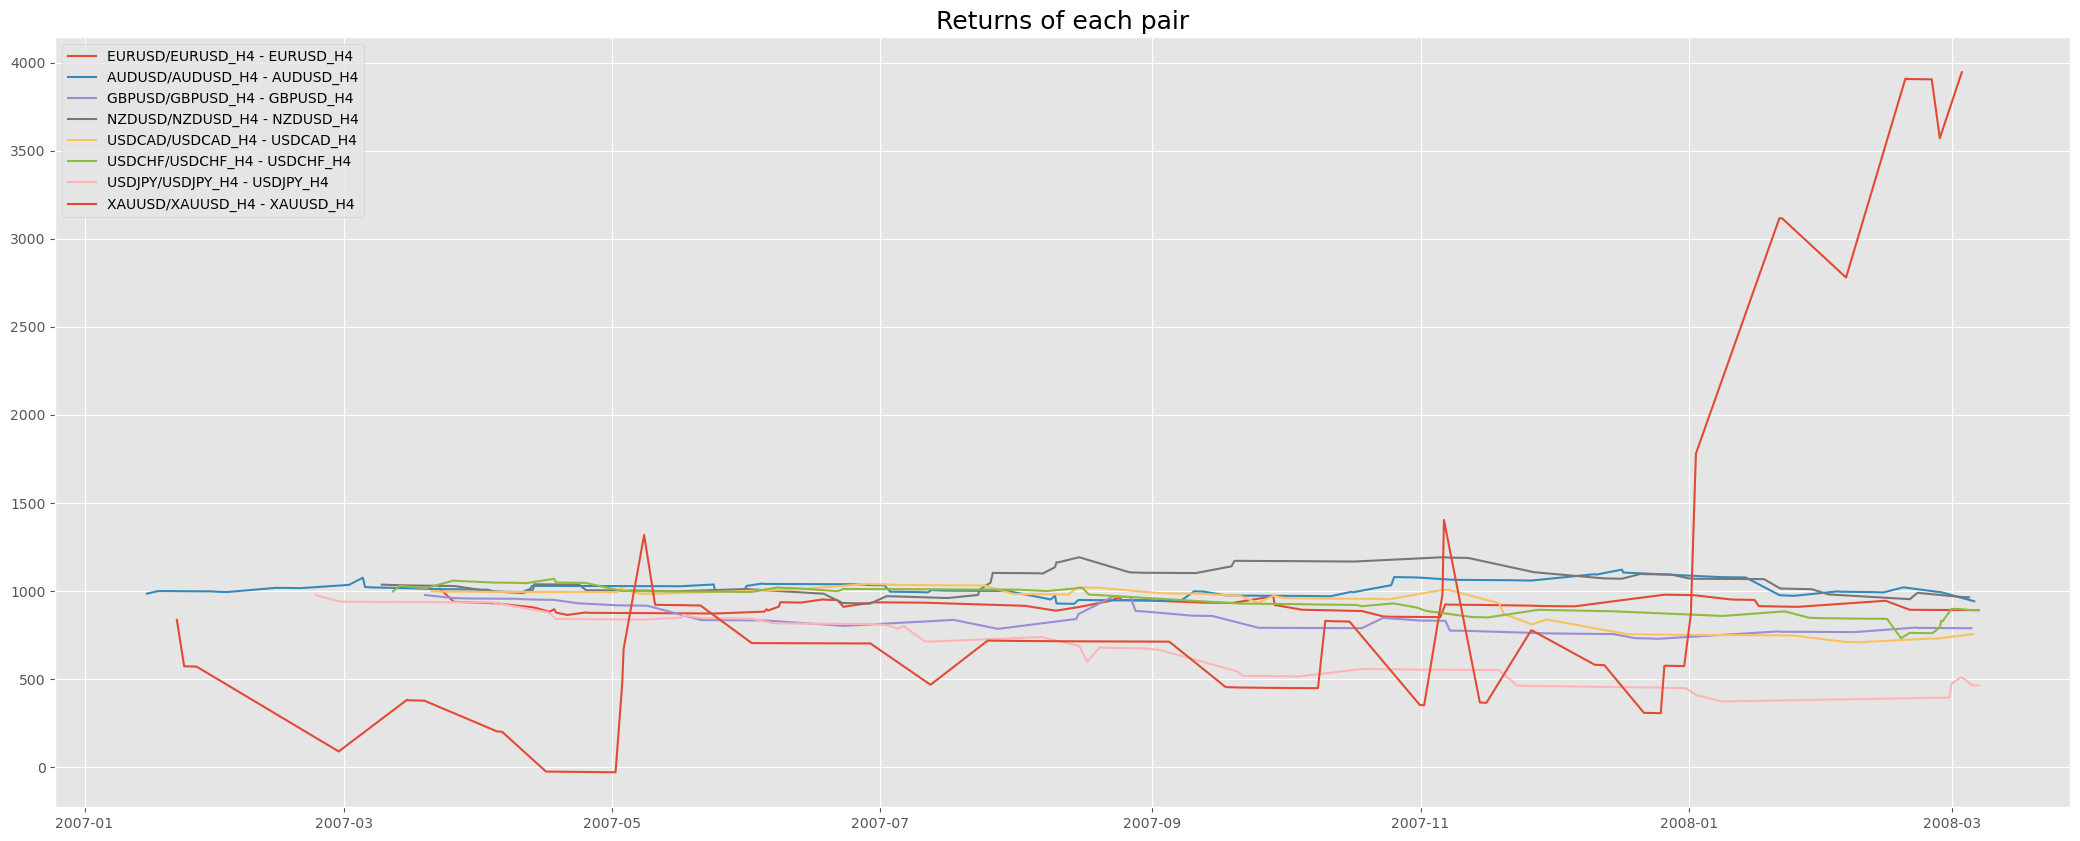

In [166]:
plt.figure(figsize = (26, 10))
for pair in range(len(pairs_list)):
    plt.plot(pairs_results[pair]['cum_res'], label = pairs_list[pair])
plt.legend()
plt.title('Returns of each pair', fontsize = 18)

***** STRATEGY PERFORMANCE *****
--------------------------------
CAGR: 3465.7 %
Sharpe ratio: 0.0
Maximum drawdown 175.64 % 

Number of trades: 454
Number of profits: 108
Number of losses: 346
Number of breakevens: 0 

Winning percentage 23.79 %
ROI: 1645
--------------------------------
Average profitable trade: 101.42
Average lossing trade: -26.9
Max profitable trade: 1336.2
Max lossing trade: -1035.8


c:\Users\Win10\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate



Text(0.5, 1.0, 'return of strategy')

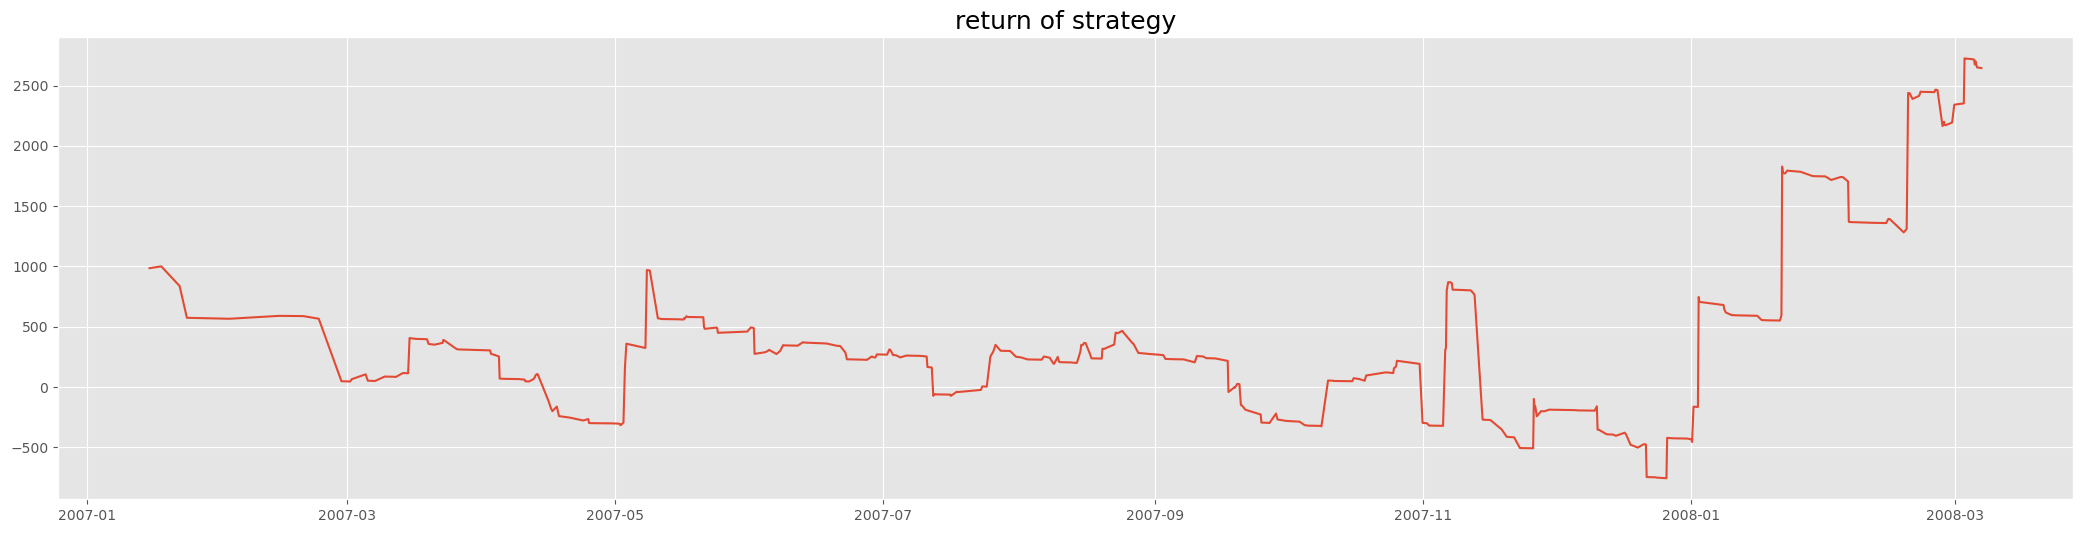

In [167]:
#Strategy performance
print('***** STRATEGY PERFORMANCE *****')
print('--------------------------------')
print('CAGR:', CAGR(strategy_results, df[0],account_size), '%')
print('Sharpe ratio:', sharpe_ratio(strategy_results))
print('Maximum drawdown', max_drawdown(strategy_results), '% \n')
print('Number of trades:', len(str_profits + str_losses + str_be))
print('Number of profits:', len(str_profits))
print('Number of losses:', len(str_losses))
print('Number of breakevens:', len(str_be), '\n')
print('Winning percentage', (round(len(str_profits) / (len(str_profits) + len(str_losses)) * 100, 2)), '%')
print('ROI:', round(strategy_results['cum_res'][-1]) - account_size)
print('--------------------------------')
print('Average profitable trade:', round(sum(str_profits) / len(str_profits), 2))
print('Average lossing trade:', round(sum(str_losses) / len(str_losses), 2))
print('Max profitable trade:', round(max(str_profits), 2))
print('Max lossing trade:', round(min(str_losses), 2))

plt.figure(figsize = (26, 6))
plt.plot(strategy_results['cum_res'])
plt.title('return of strategy', fontsize = 18)

EURUSD/EURUSD_H4 - EURUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 60
Number of profits: 16
Number of losses: 44
Number of breakevens: 0 

Winning percentage 26.67 %
ROI: -108.1
--------------------------------
Average profitable trade: 27.98
Average lossing trade: -12.63
Max profitable trade: 72.9
Max lossing trade: -75.3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    17
Mon     9
Thu    10
Tue     6
Wed    18
Name: result, dtype: int64


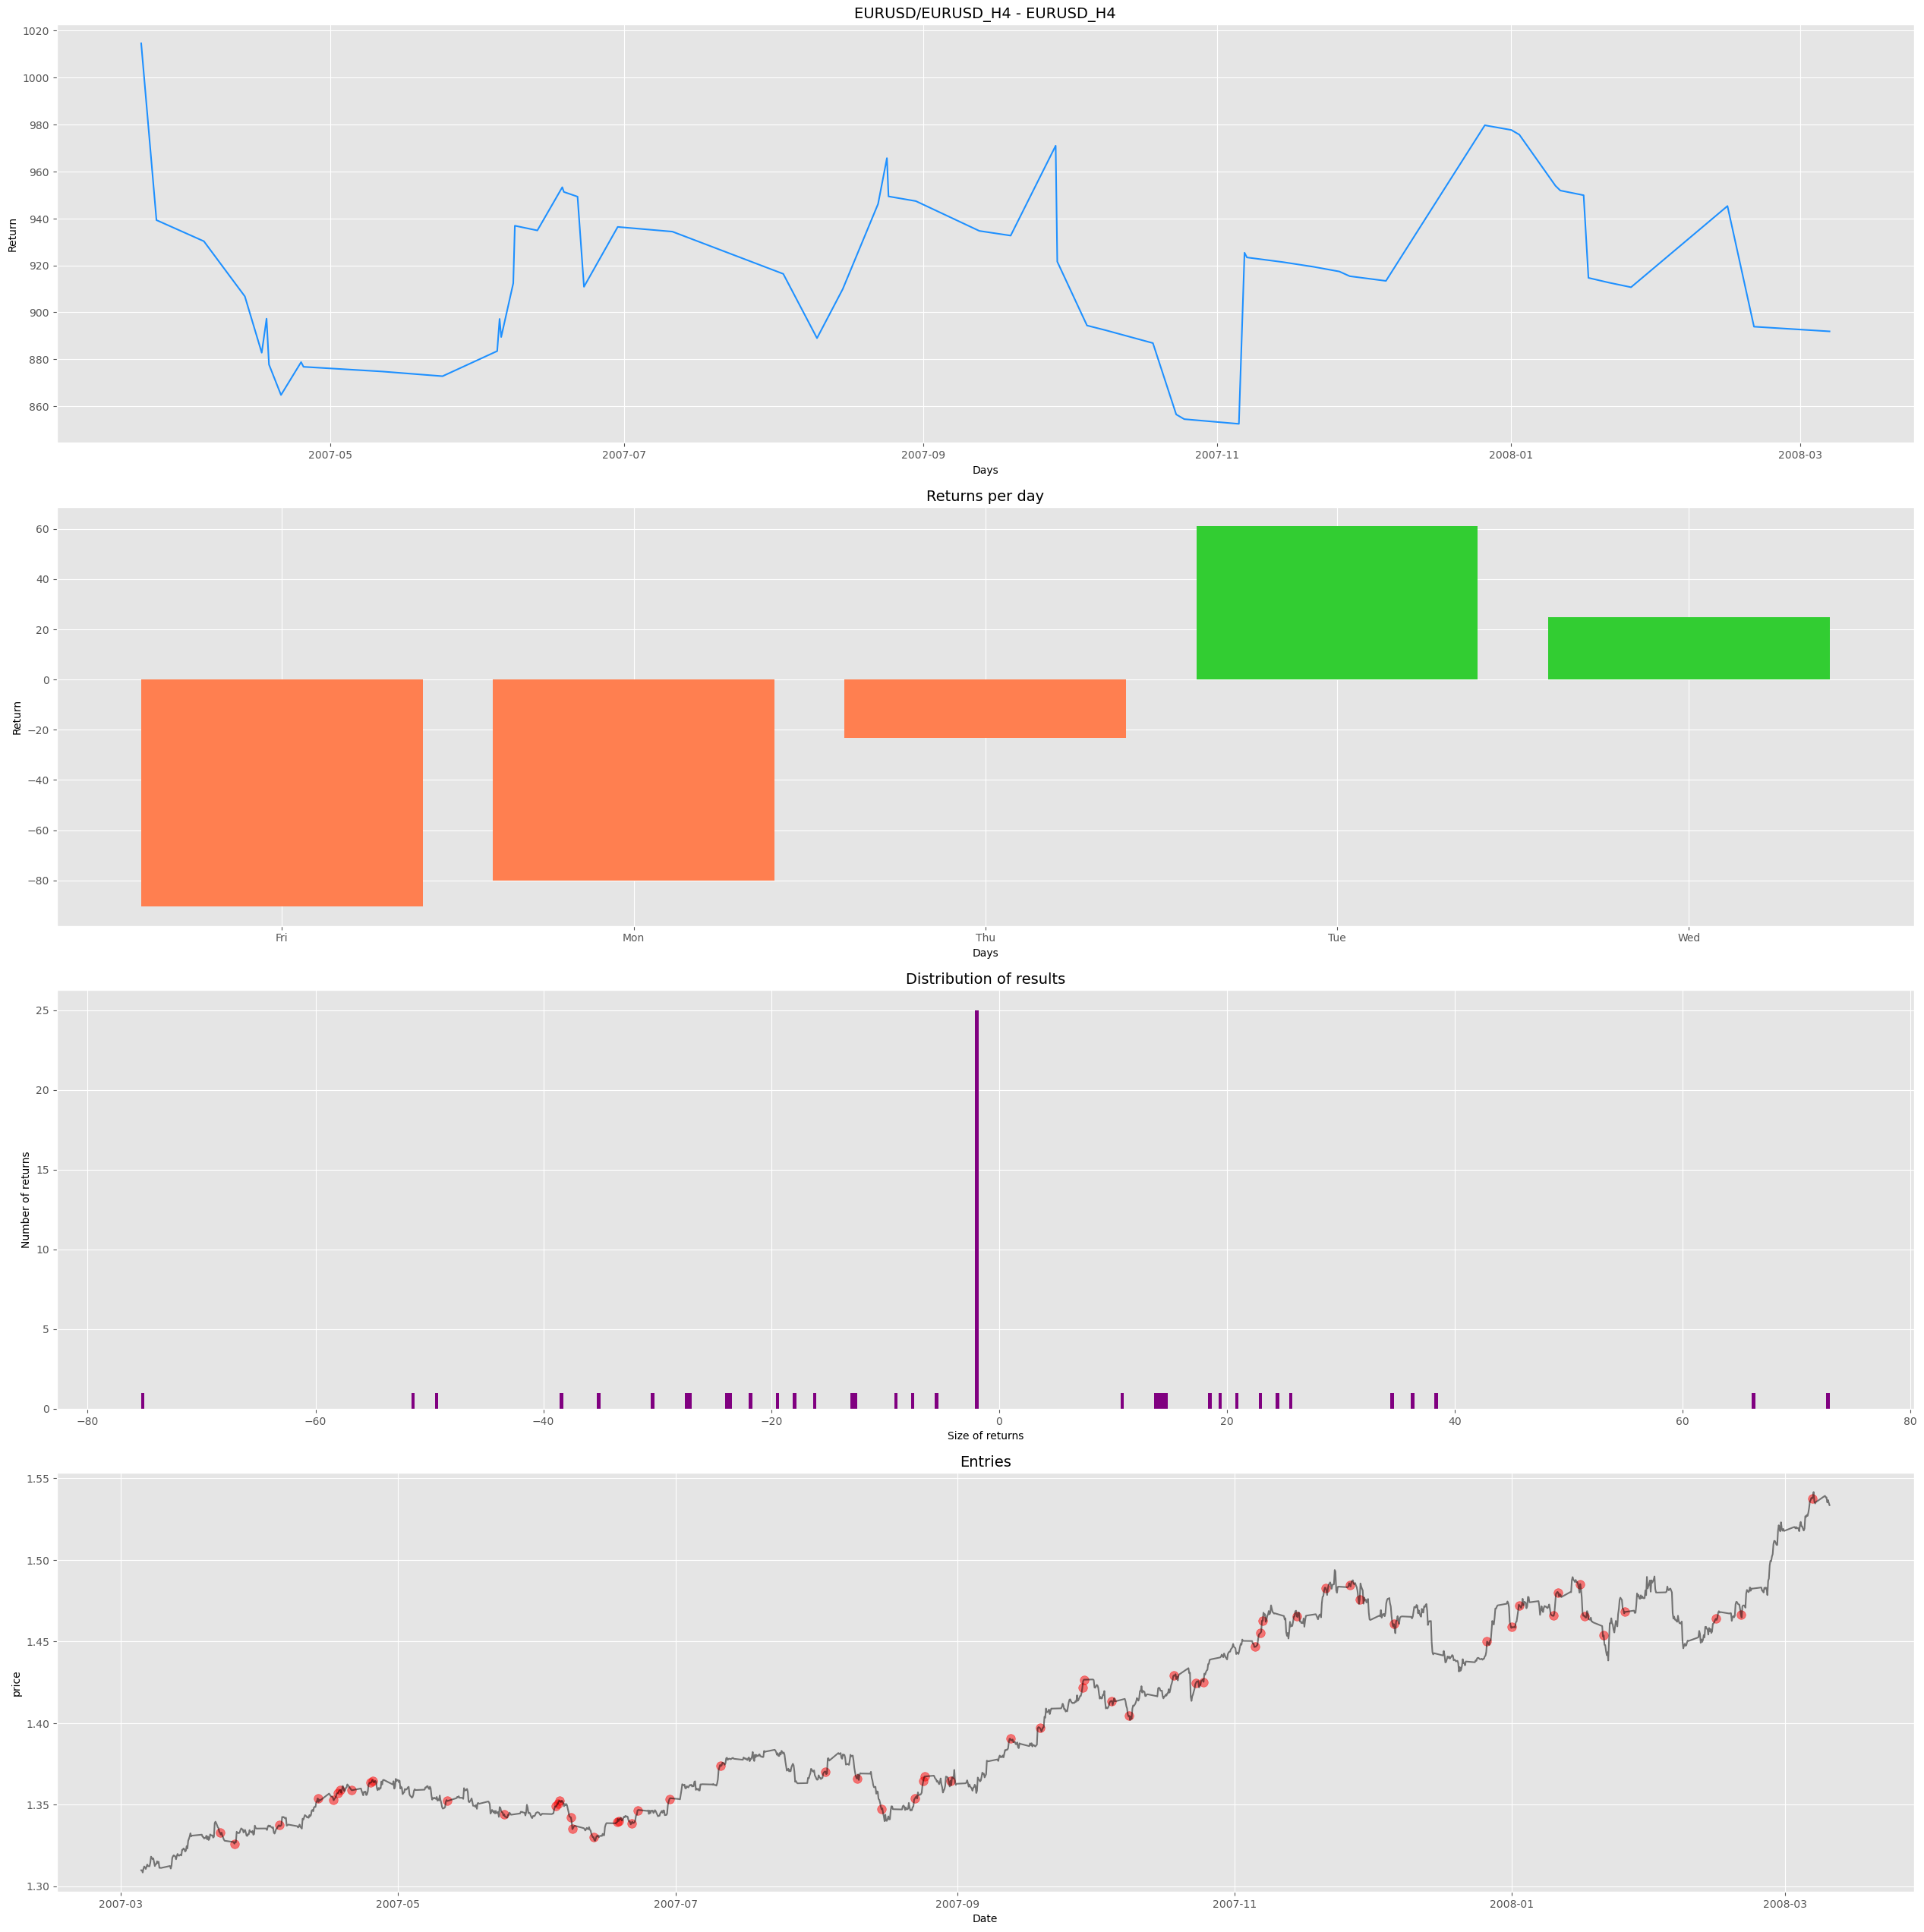

AUDUSD/AUDUSD_H4 - AUDUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 78
Number of profits: 21
Number of losses: 57
Number of breakevens: 0 

Winning percentage 26.92 %
ROI: -57.8
--------------------------------
Average profitable trade: 25.13
Average lossing trade: -10.27
Max profitable trade: 53.4
Max lossing trade: -100.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    10
Mon    24
Sun     1
Thu    15
Tue    12
Wed    16
Name: result, dtype: int64


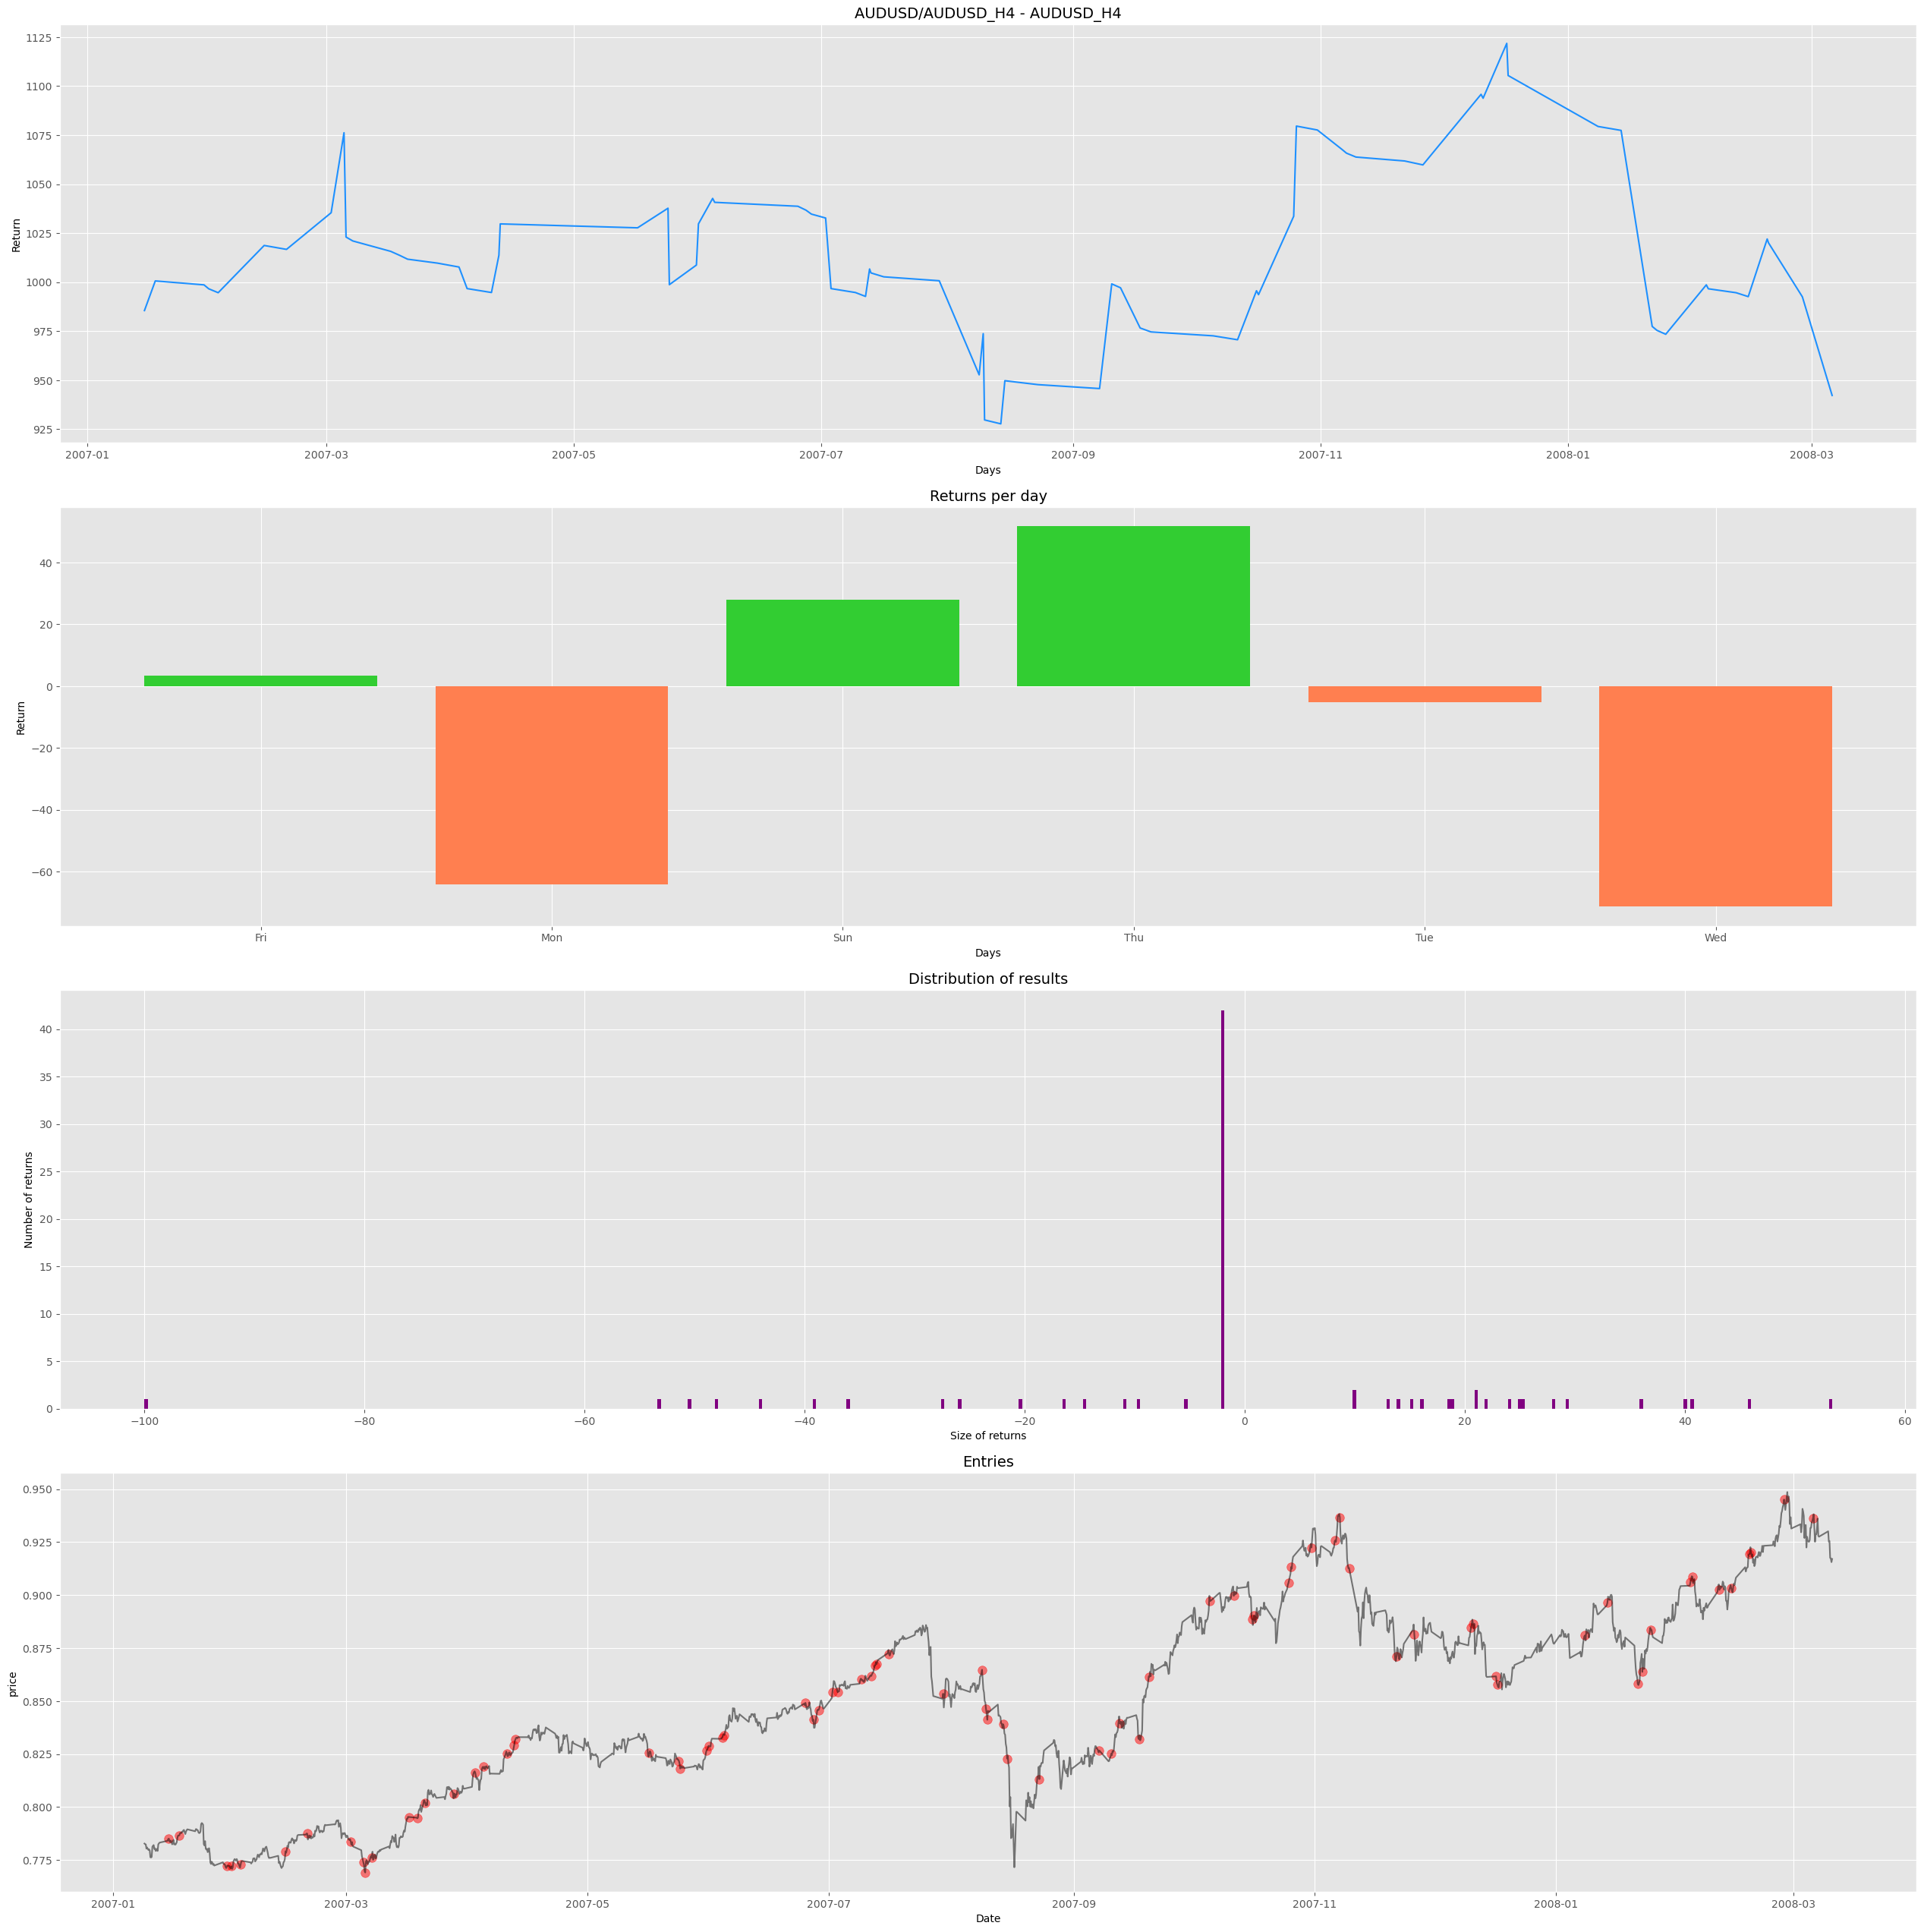

GBPUSD/GBPUSD_H4 - GBPUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 43
Number of profits: 7
Number of losses: 36
Number of breakevens: 0 

Winning percentage 16.28 %
ROI: -210.6
--------------------------------
Average profitable trade: 49.07
Average lossing trade: -15.39
Max profitable trade: 98.5
Max lossing trade: -81.5
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri     6
Mon    10
Sun     2
Thu     6
Tue     9
Wed    10
Name: result, dtype: int64


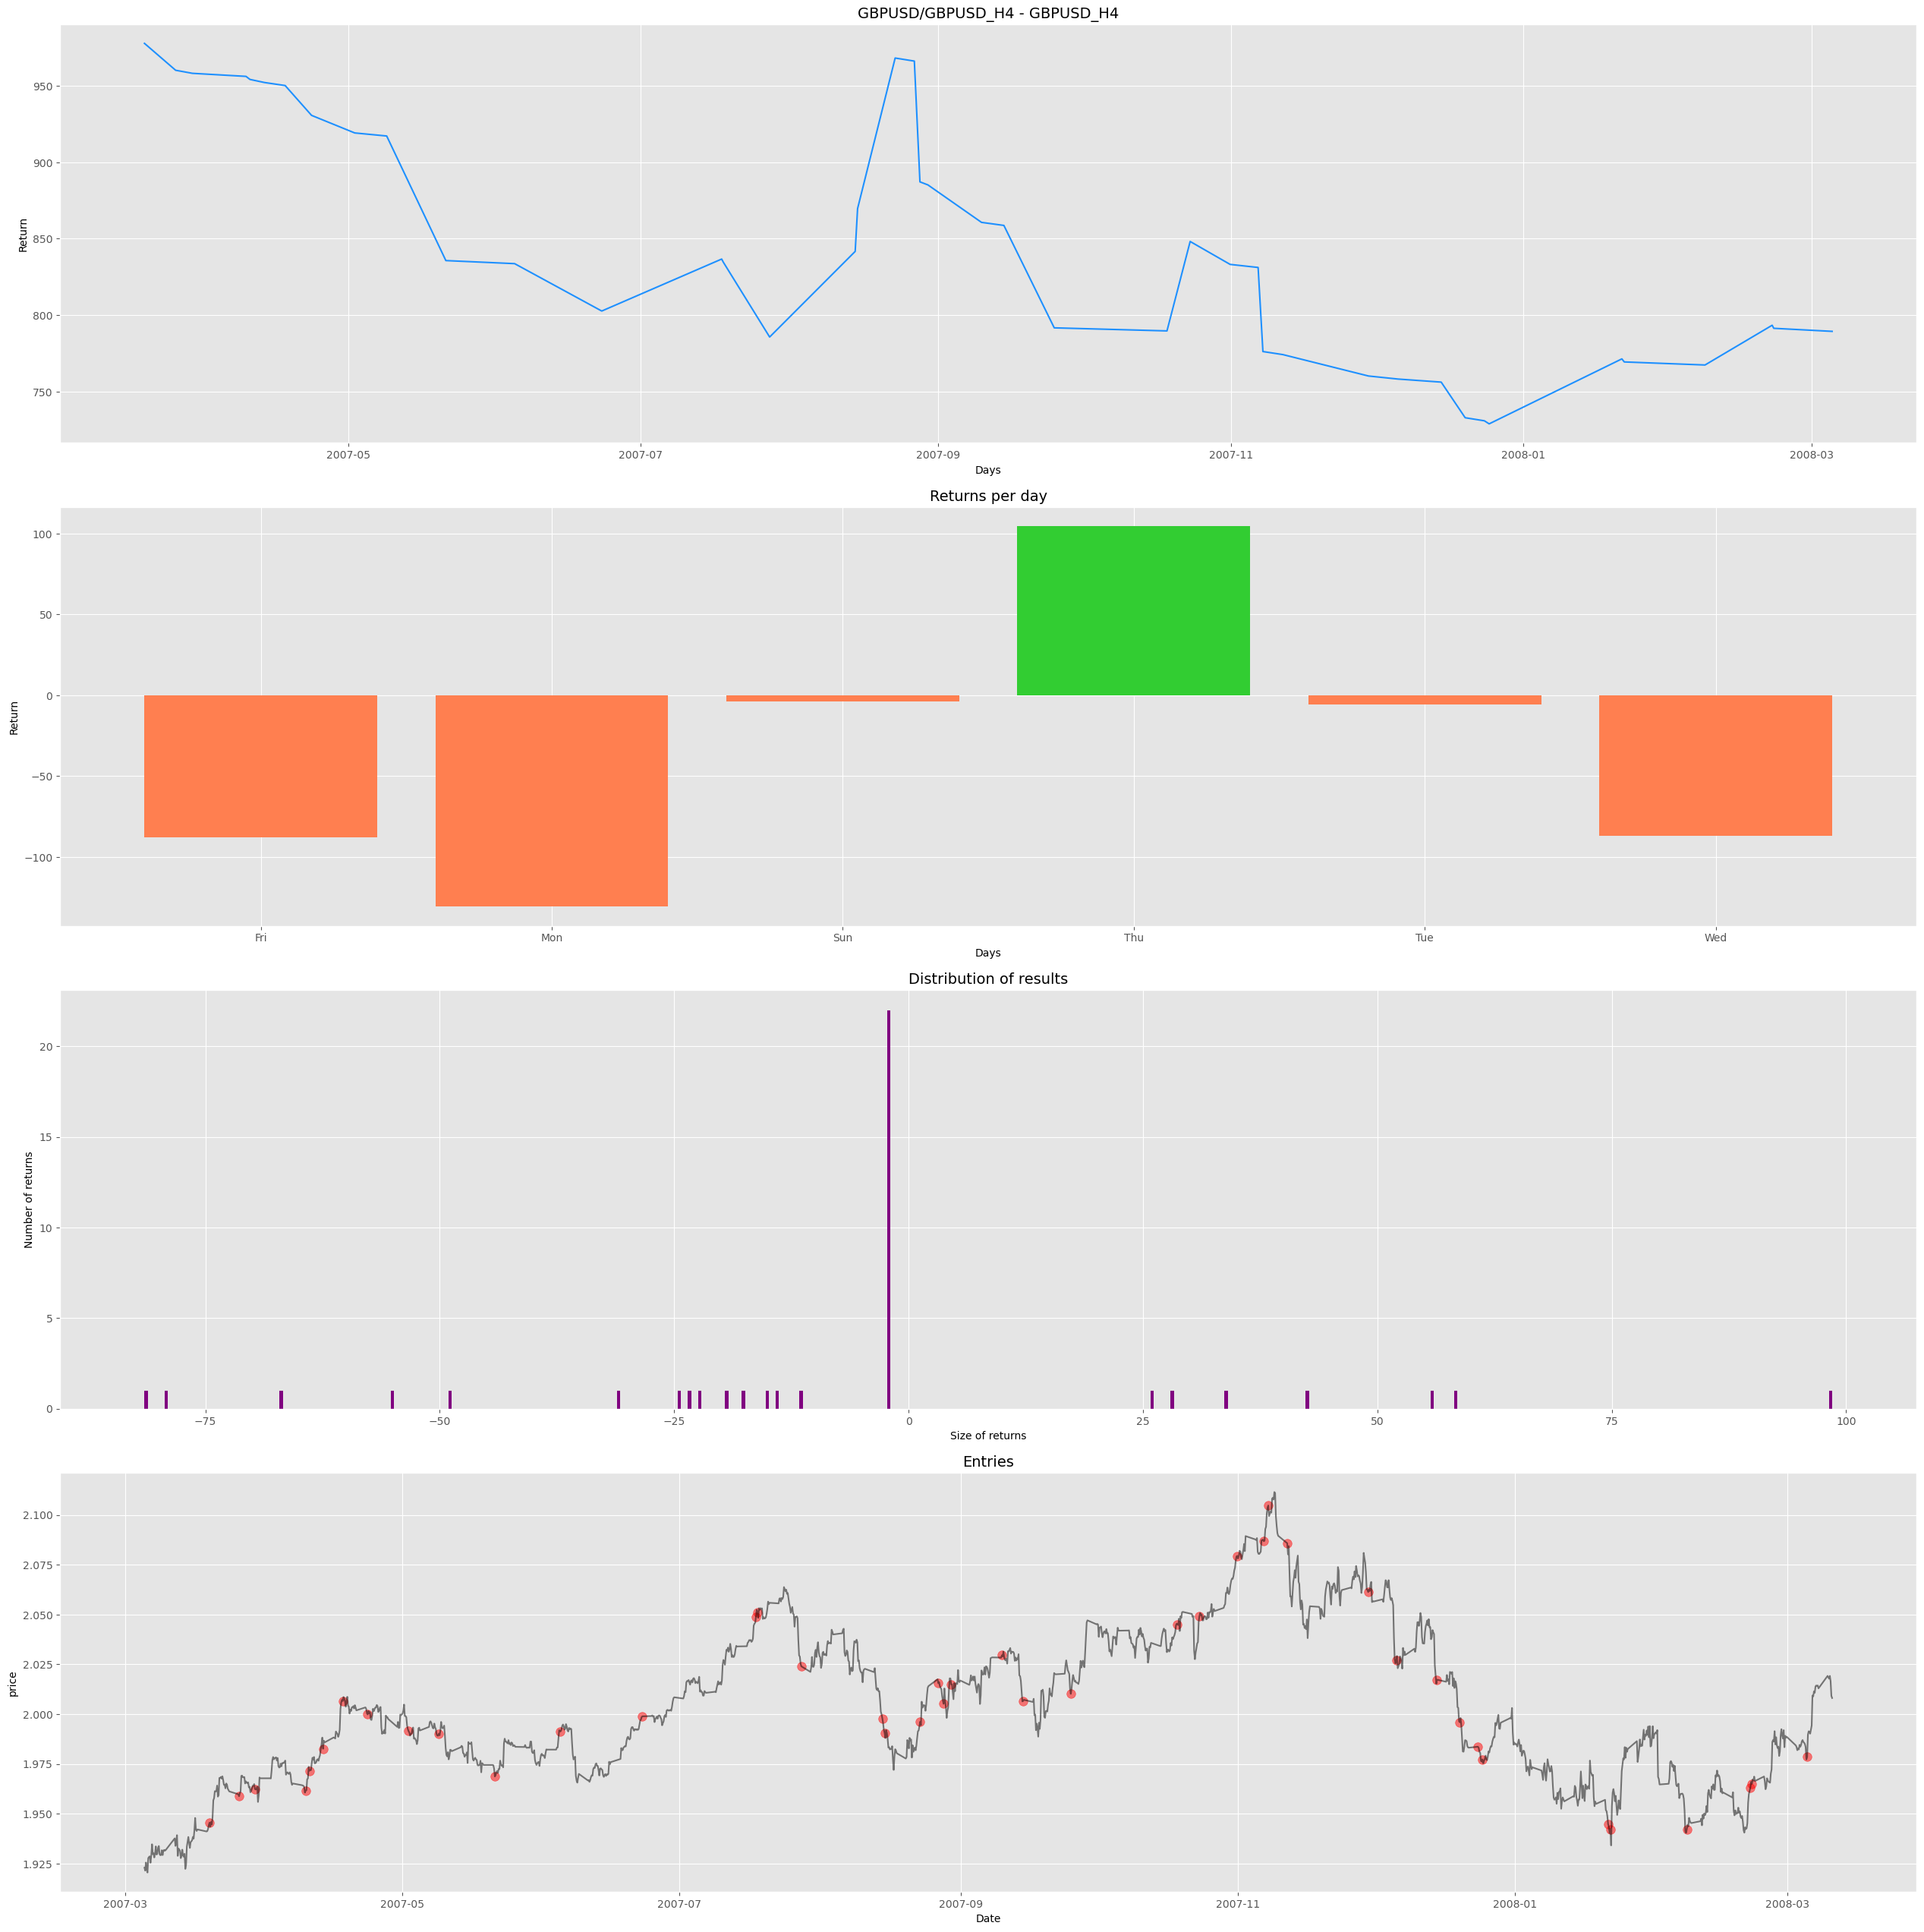

NZDUSD/NZDUSD_H4 - NZDUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 60
Number of profits: 17
Number of losses: 43
Number of breakevens: 0 

Winning percentage 28.33 %
ROI: -35.3
--------------------------------
Average profitable trade: 31.75
Average lossing trade: -13.37
Max profitable trade: 55.0
Max lossing trade: -86.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    18
Mon    14
Sun     3
Thu     5
Tue     8
Wed    12
Name: result, dtype: int64


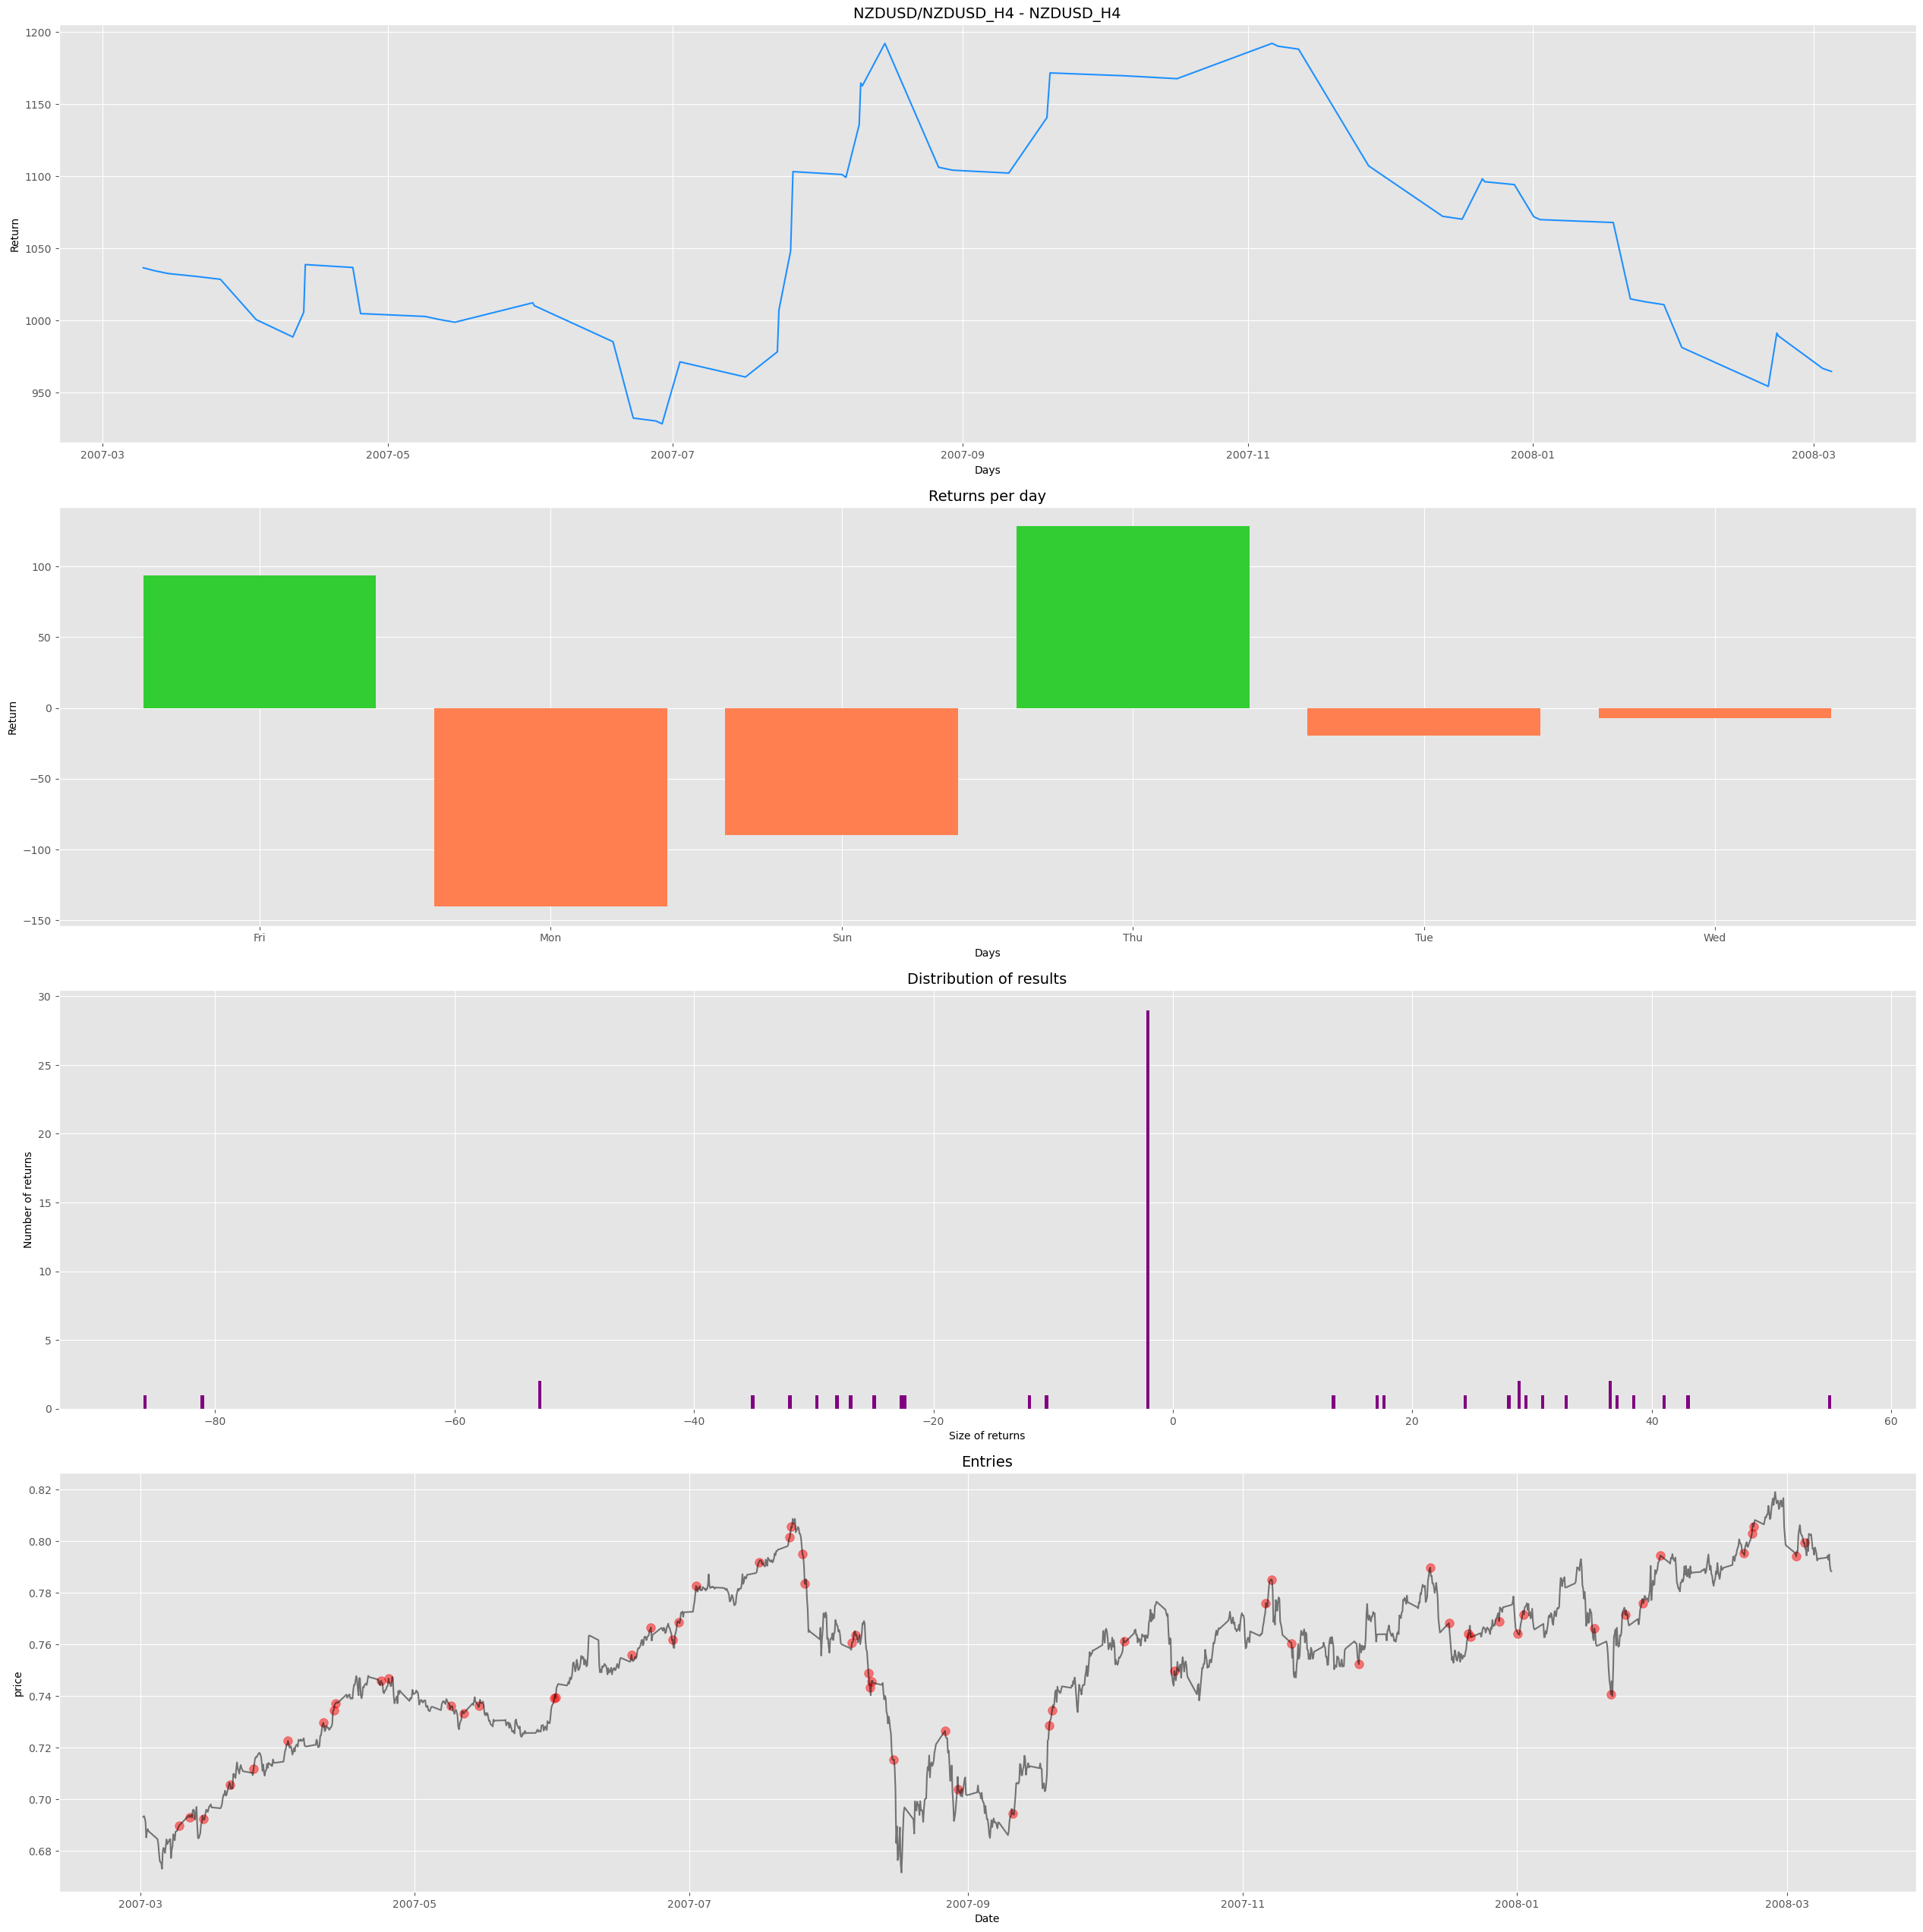

USDCAD/USDCAD_H4 - USDCAD_H4 - PERFORMANCE
--------------------------------
Number of trades: 44
Number of profits: 9
Number of losses: 35
Number of breakevens: 0 

Winning percentage 20.45 %
ROI: -243.9
--------------------------------
Average profitable trade: 32.93
Average lossing trade: -15.44
Max profitable trade: 54.5
Max lossing trade: -84.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri     4
Mon     7
Sun     4
Thu     6
Tue    14
Wed     9
Name: result, dtype: int64


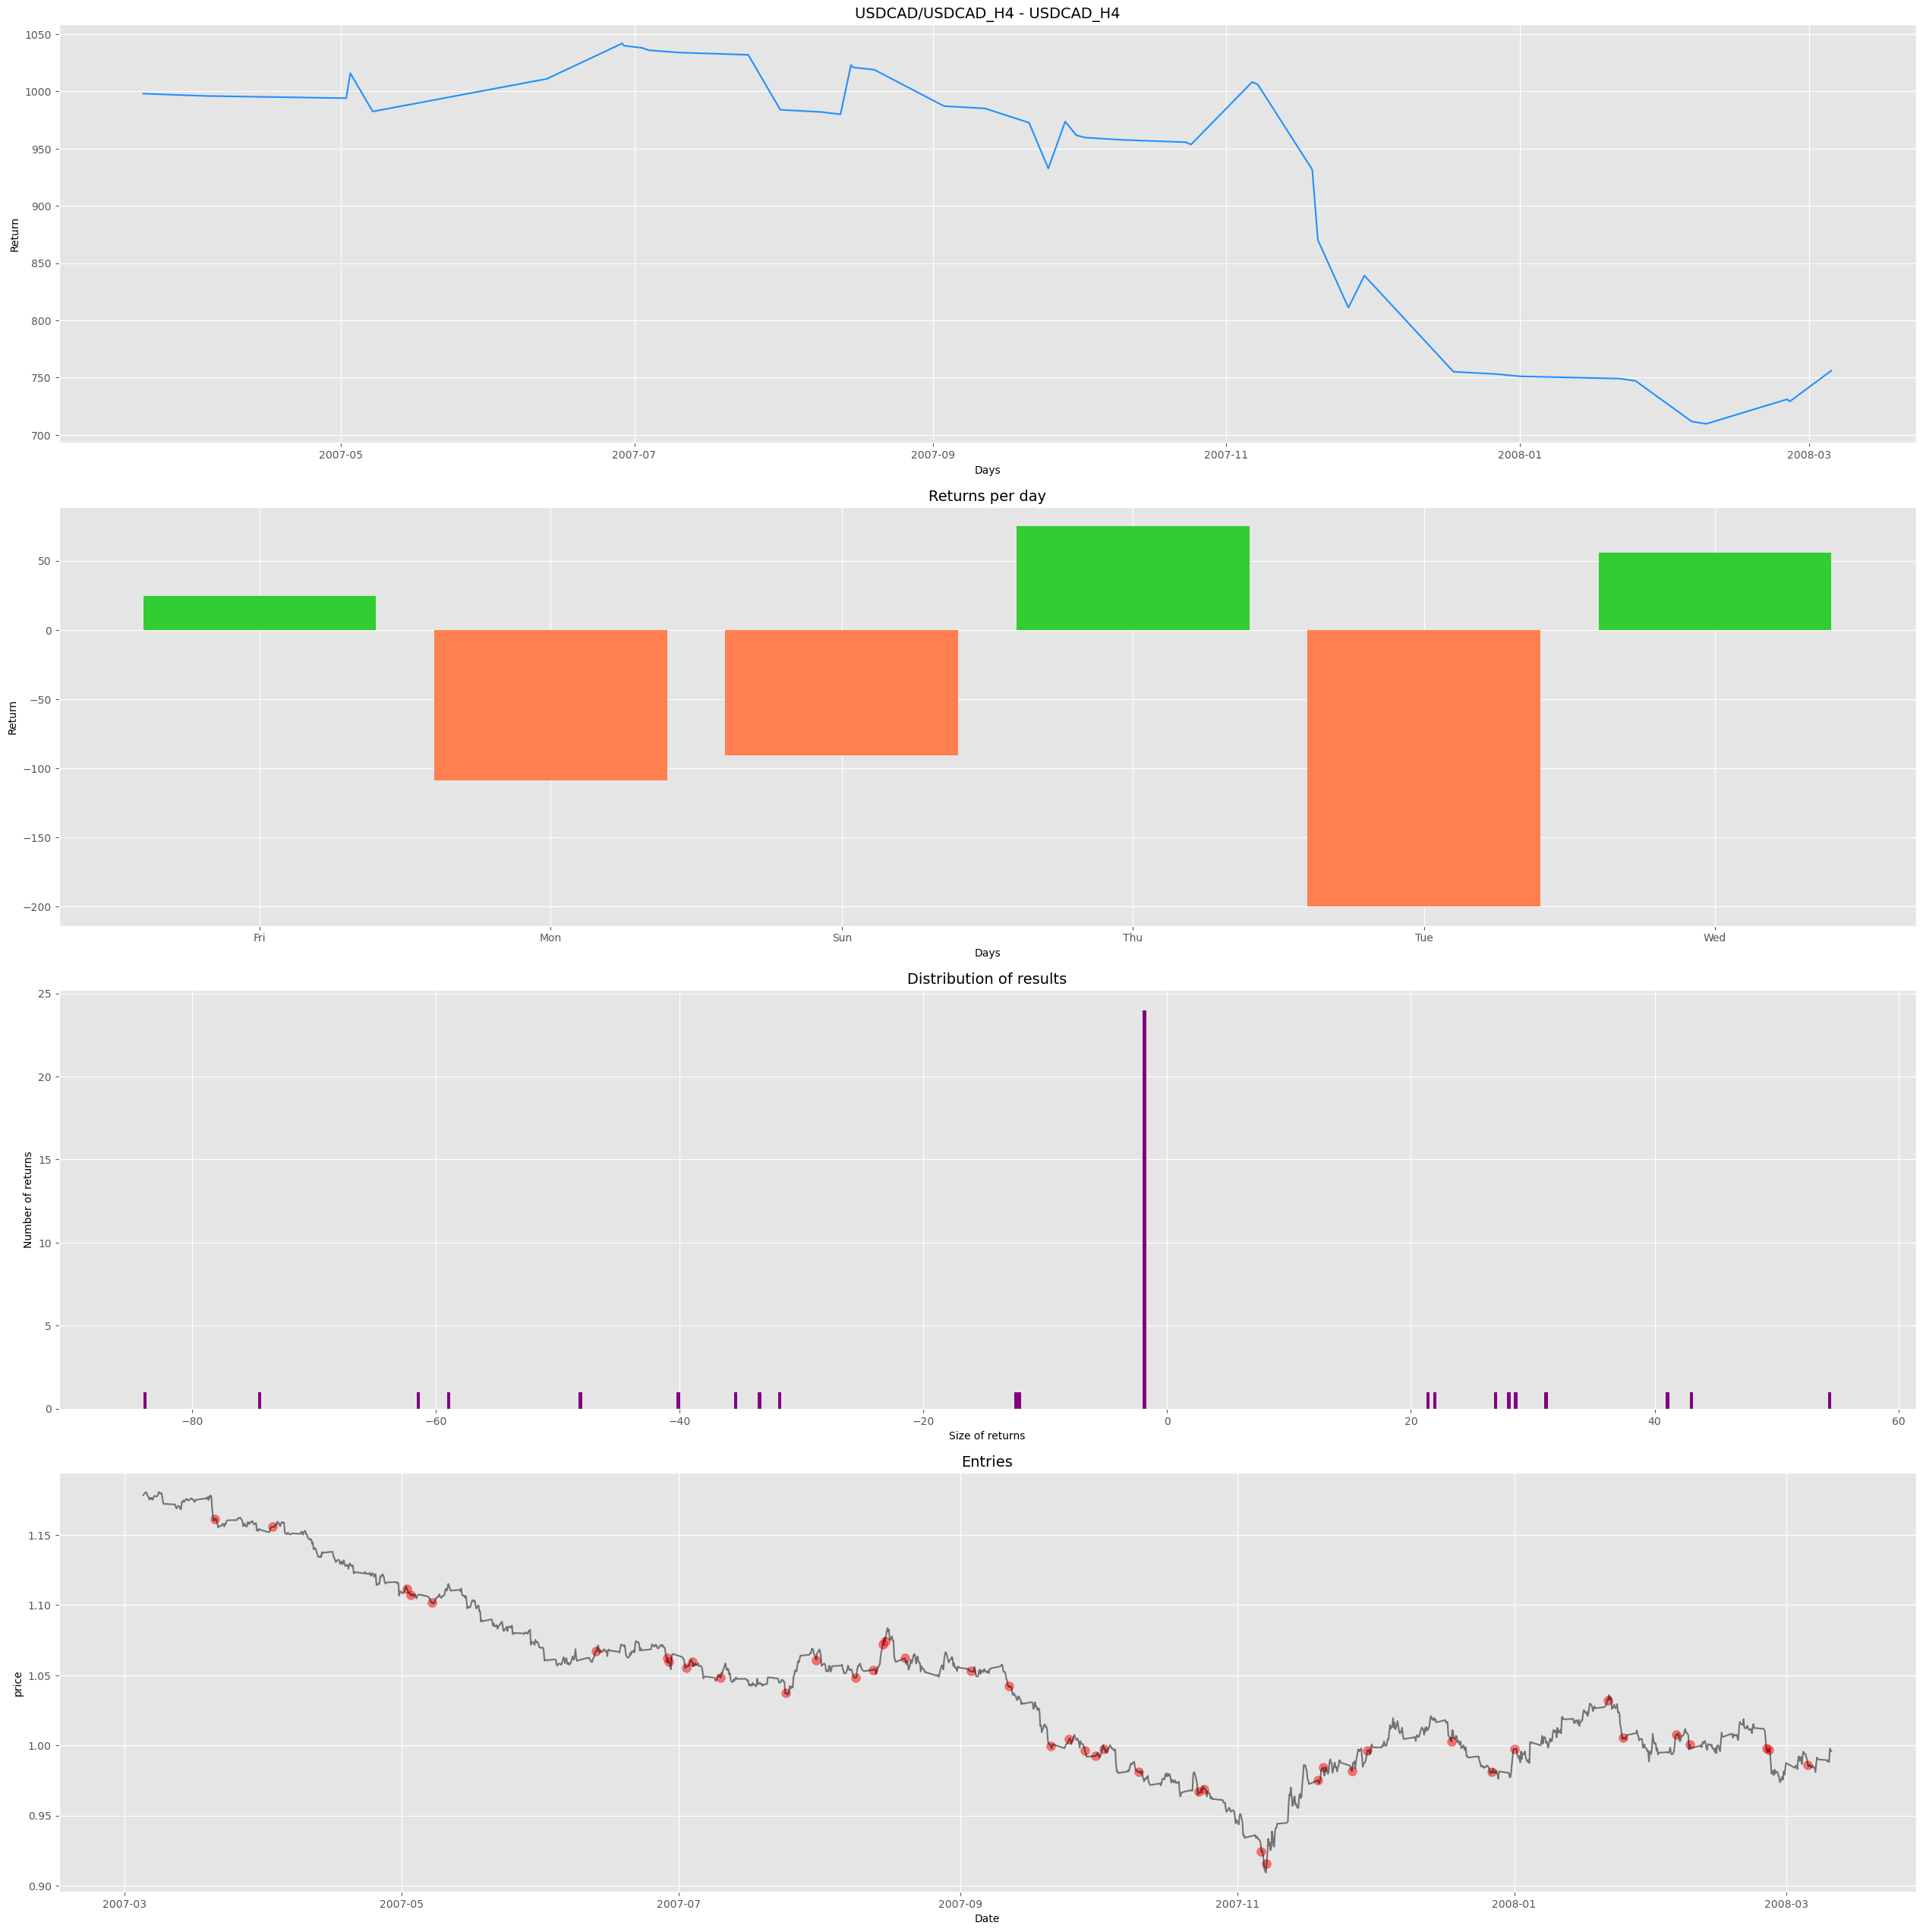

USDCHF/USDCHF_H4 - USDCHF_H4 - PERFORMANCE
--------------------------------
Number of trades: 59
Number of profits: 14
Number of losses: 45
Number of breakevens: 0 

Winning percentage 23.73 %
ROI: -108.5
--------------------------------
Average profitable trade: 29.77
Average lossing trade: -11.67
Max profitable trade: 69.5
Max lossing trade: -110.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    13
Mon    13
Thu     9
Tue     7
Wed    17
Name: result, dtype: int64


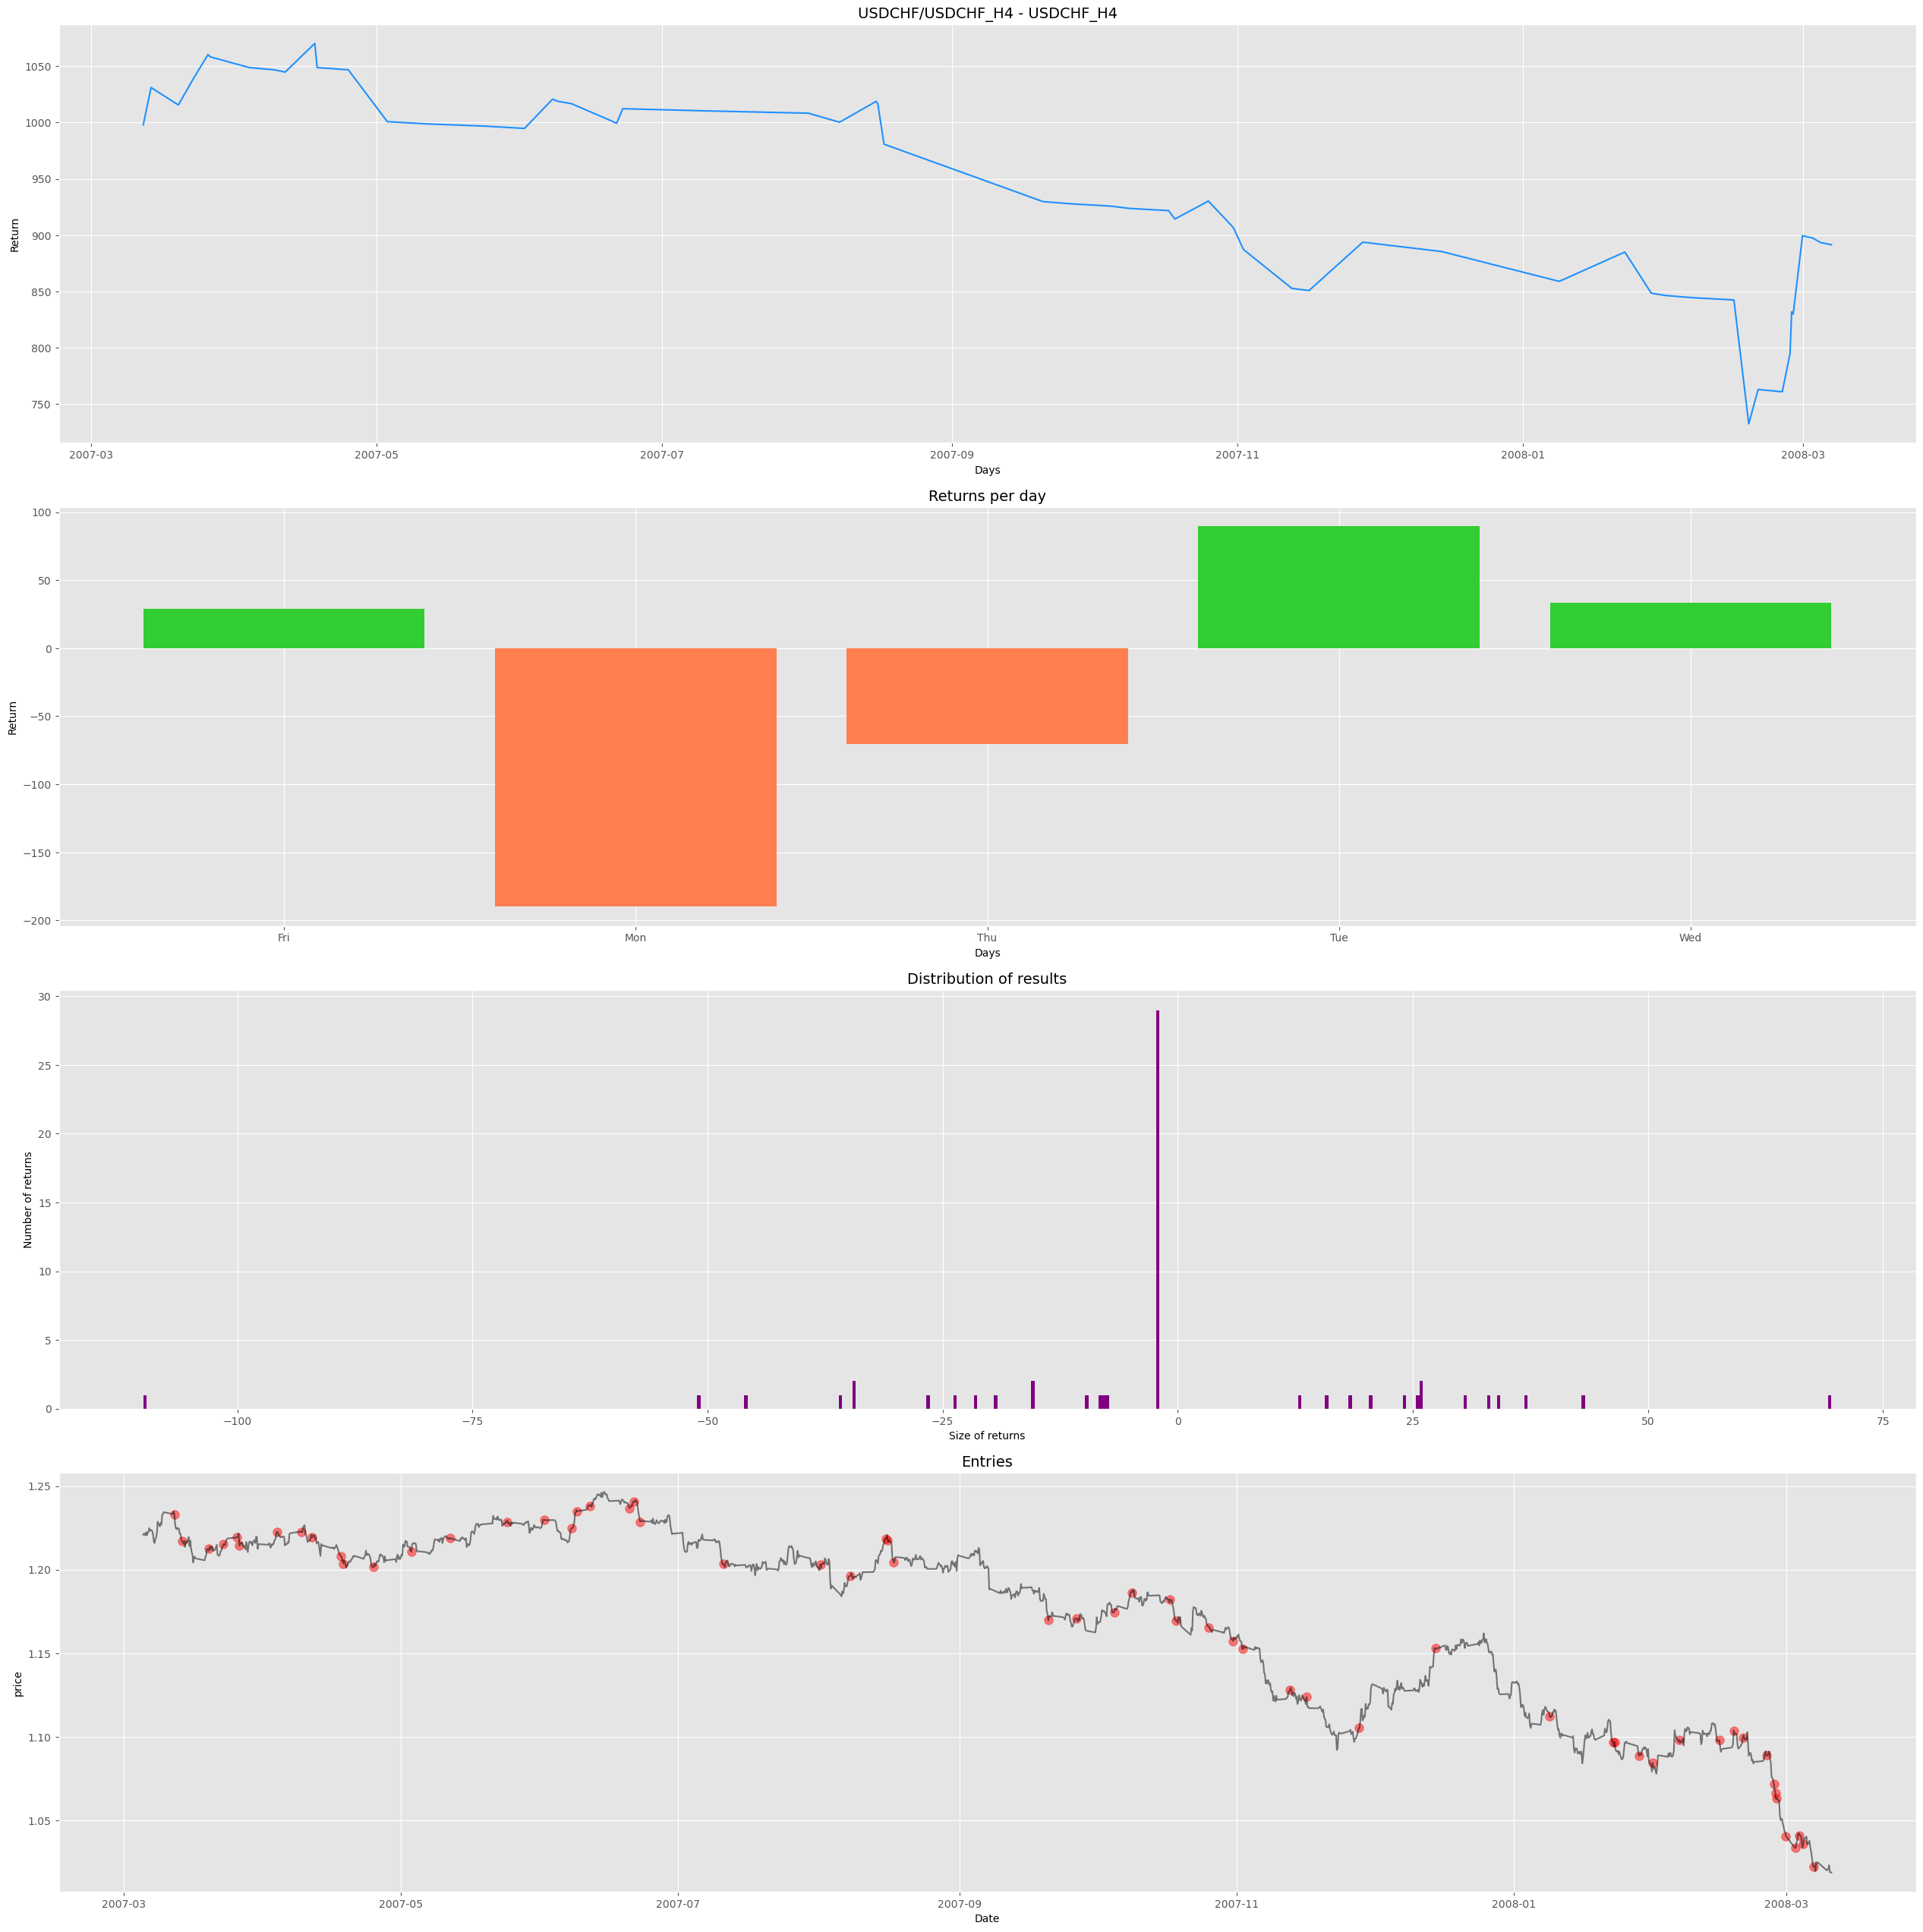

USDJPY/USDJPY_H4 - USDJPY_H4 - PERFORMANCE
--------------------------------
Number of trades: 54
Number of profits: 9
Number of losses: 45
Number of breakevens: 0 

Winning percentage 16.67 %
ROI: -535.7
--------------------------------
Average profitable trade: 36.89
Average lossing trade: -19.28
Max profitable trade: 82.0
Max lossing trade: -122.5
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    12
Mon    15
Sun     2
Thu     9
Tue     4
Wed    12
Name: result, dtype: int64


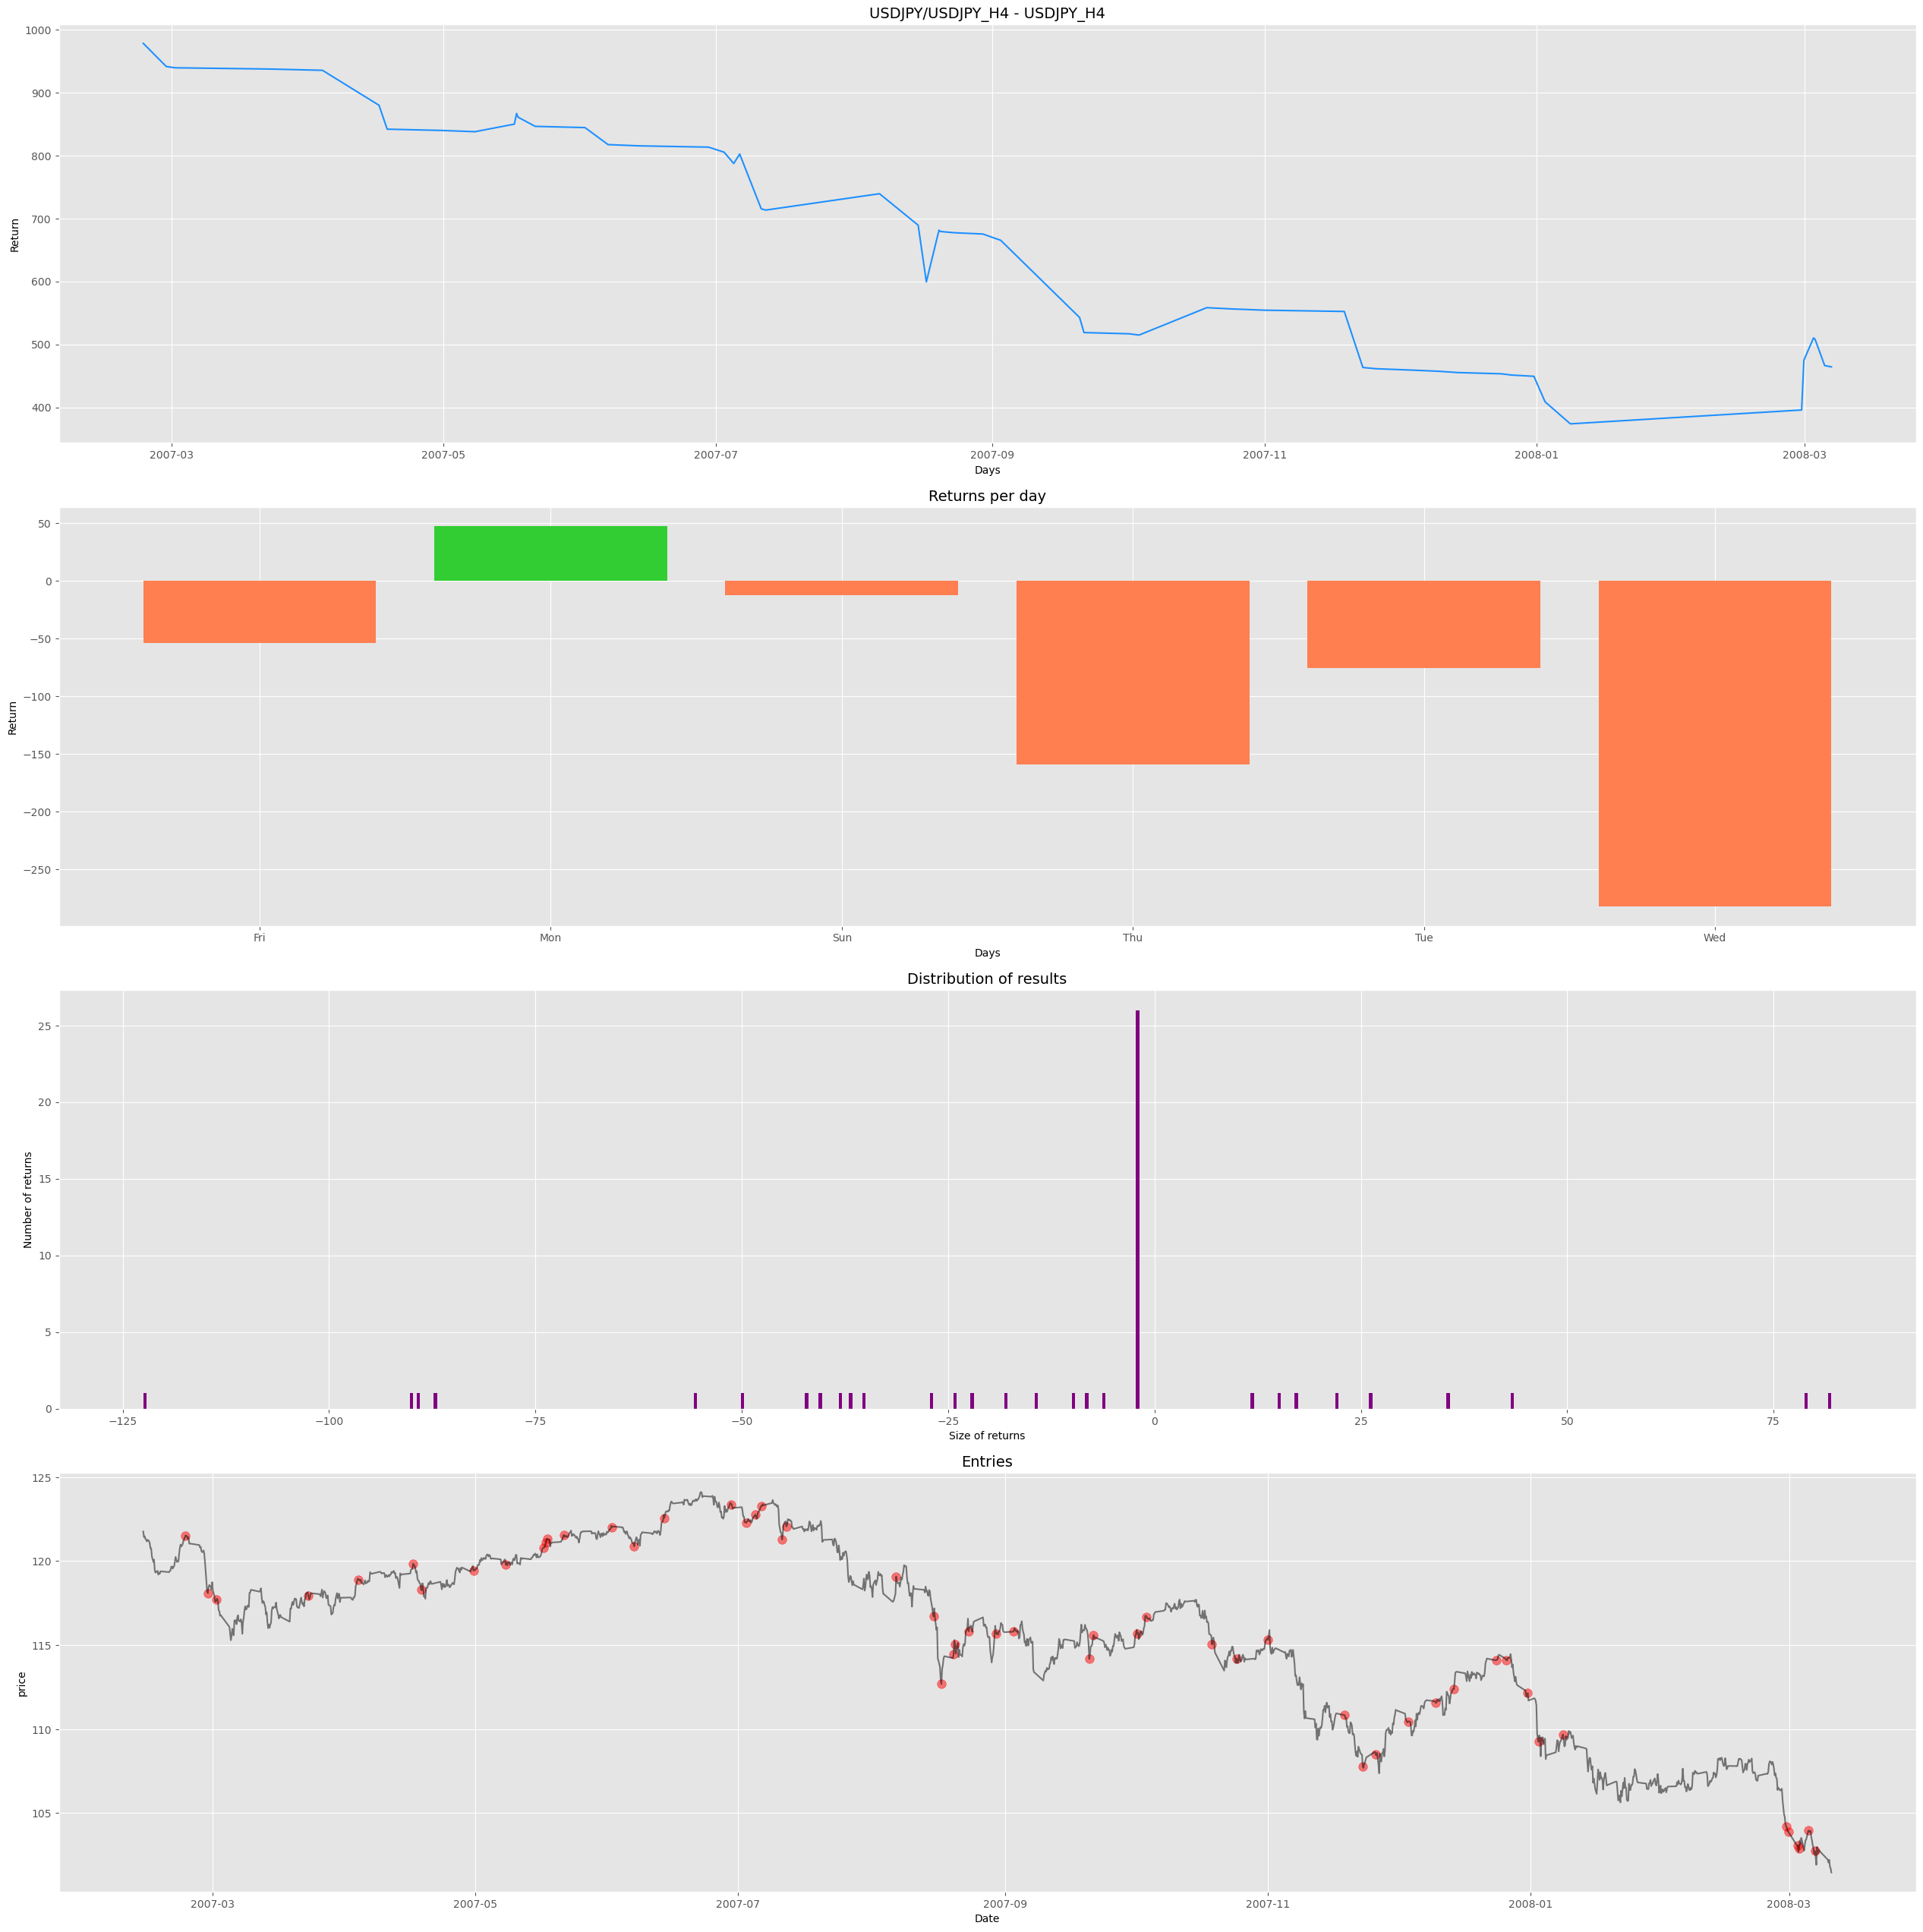

XAUUSD/XAUUSD_H4 - XAUUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 56
Number of profits: 15
Number of losses: 41
Number of breakevens: 0 

Winning percentage 26.79 %
ROI: 2944.9
--------------------------------
Average profitable trade: 536.67
Average lossing trade: -124.51
Max profitable trade: 1336.2
Max lossing trade: -1035.8
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri     5
Mon    16
Thu    12
Tue    13
Wed    10
Name: result, dtype: int64


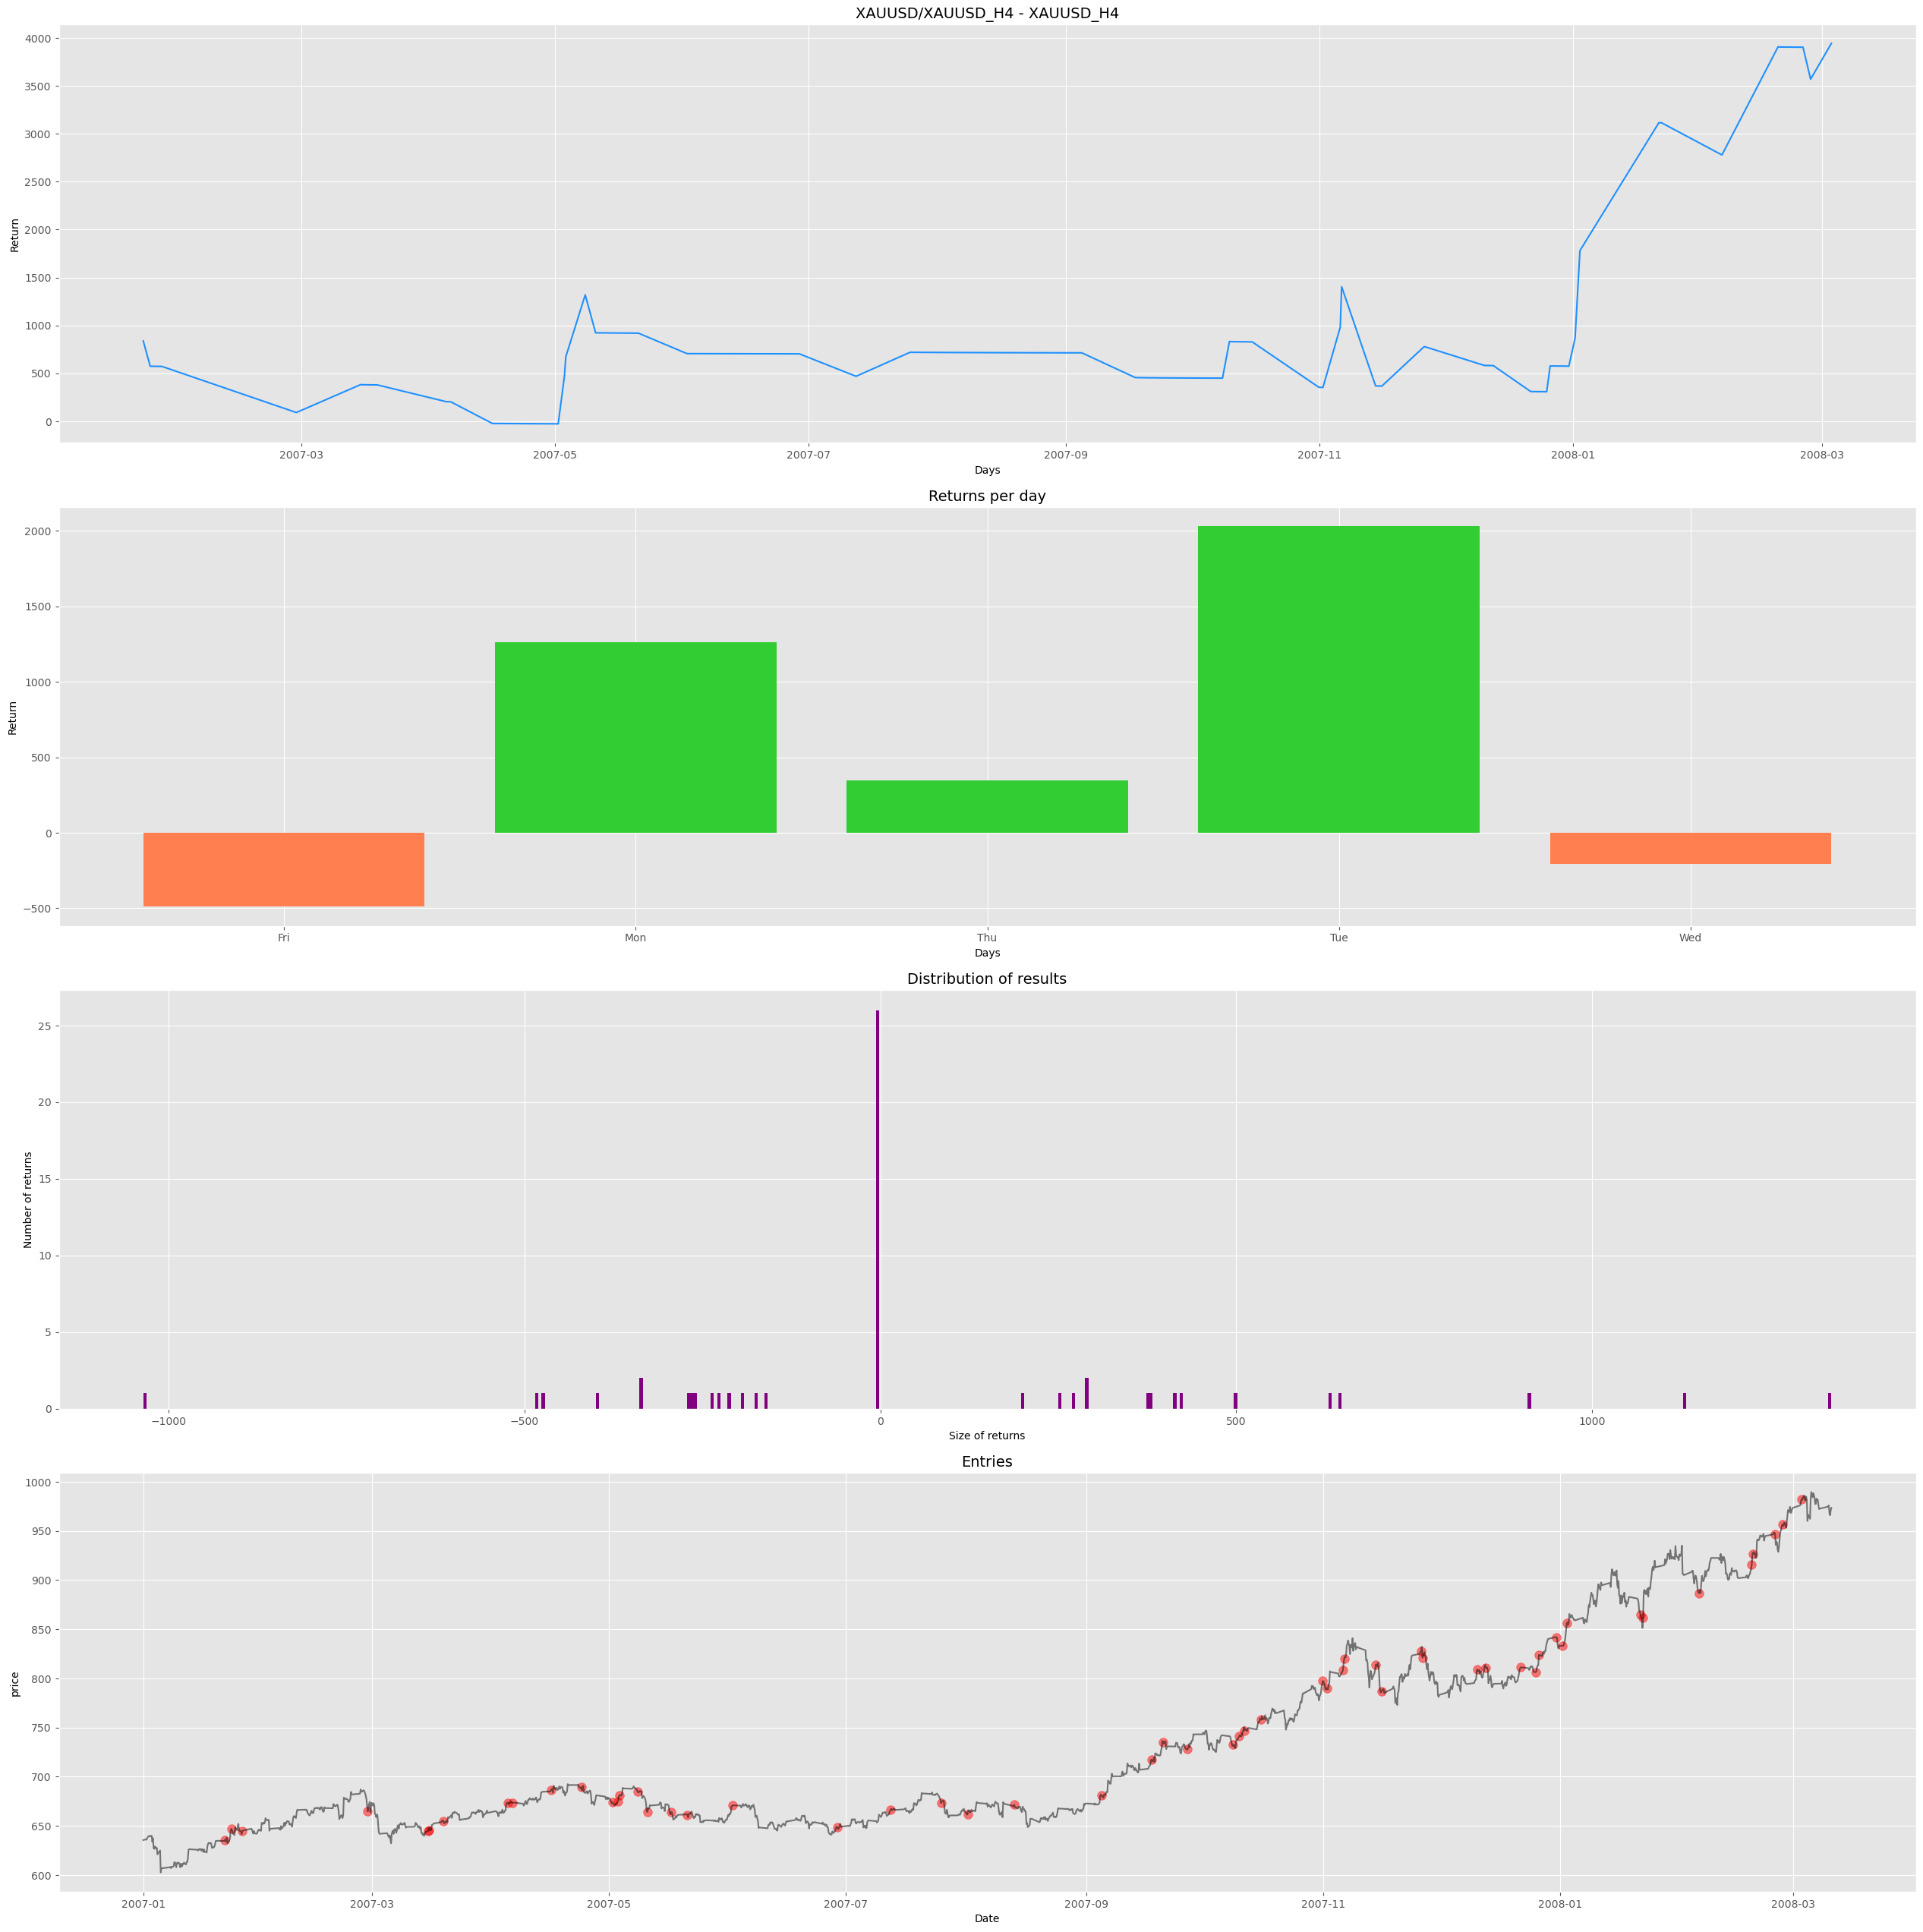

In [168]:
#performance for each pair
for pair in range(len(pairs_list)):
    print(pairs_list[pair], '- PERFORMANCE')
    print('--------------------------------')
    print('Number of trades:', len(profits[pair] + losses[pair] + be[pair]))
    print('Number of profits:', len(profits[pair]))
    print('Number of losses:', len(losses[pair]))
    print('Number of breakevens:', len(be[pair]), '\n')
    print('Winning percentage', (round(len(profits[pair]) / (len(profits[pair]) + len(losses[pair])) * 100, 2)), '%')
    print('ROI:', round(pairs_results[pair]['cum_res'][-1] - account_size, 2))
    print('--------------------------------')
    print('Average profitable trade:', round(sum(profits[pair]) / len(profits[pair]), 2))
    print('Average lossing trade:', round(sum(losses[pair]) / len(losses[pair]), 2))
    print('Max profitable trade:', round(max(profits[pair]), 2))
    print('Max lossing trade:', round(min(losses[pair]), 2))
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx \n')
    
    trades_per_day = pairs_results[pair].groupby('day_of_trade').count()['result']
    day_return = pairs_results[pair].groupby('day_of_trade').sum()['result']
    day_return_positive = day_return > 0
    
    print('Number of trades per day \n', trades_per_day)
    
    fig, axes = plt.subplots(4, 1, figsize = (26, 26))
    fig.tight_layout(pad = 4)
    
    axes[0].plot(pairs_results[pair]['cum_res'], color = 'dodgerblue')
    axes[0].set_title(pairs_list[pair], fontsize = 14)
    axes[0].set_xlabel('Days')
    axes[0].set_ylabel('Return')
    
    axes[1].bar(day_return.keys(), height = day_return, color = day_return_positive.map({True: 'limegreen', False: 'coral'}))
    axes[1].set_title('Returns per day', fontsize = 14)
    axes[1].set_xlabel('Days')
    axes[1].set_ylabel('Return')
    
    axes[2].hist(pairs_results[pair]['result'], bins = 500, color = 'purple')
    axes[2].set_title('Distribution of results', fontsize = 14)
    axes[2].set_xlabel('Size of returns')
    axes[2].set_ylabel('Number of returns')
    
    axes[3].plot(df[pair]['Close'], color = 'black', alpha = 0.5)
    axes[3].scatter(pairs_results[pair].index, pairs_results[pair]['entry_price'], s = 70, color = 'red', alpha = 0.5)
    axes[3].set_title('Entries', fontsize = 14)
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('price')
    
    plt.show()